<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/master/notebooks/division_approach/4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 - Clustering process and validation



---



---



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

df_h1_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h1_ma.csv"
df_h2_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h2_ma.csv"
df_h3_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h3_ma.csv"
df_h4_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h4_ma.csv"

numerical_features = ['LIT_HC', 'LIT_HP', 'N_ETB',
'N_UFS', 'PN_MEDICAL', 'POPULATION',
'P_MEDICAL', 'QUANTITY', 'QUANTITY_MA',
'SEJ_HAD', 'SEJ_MCO', 'SEJ_PSY',
'SEJ_SLD', 'SEJ_SSR', 'HOSPI_CODE_UCD_NUM']

df_h1 = pd.read_csv(df_h1_url)
df_h2 = pd.read_csv(df_h2_url)
df_h3 = pd.read_csv(df_h3_url)
df_h4 = pd.read_csv(df_h4_url)

In [72]:
dataframes = [df_h1, df_h2, df_h3, df_h4]

for i, df in enumerate(dataframes):
    dataframes[i]['HOSPI_CODE_UCD_NUM'] = df['HOSPI_CODE_UCD'].astype('category')
    dataframes[i]['HOSPI_CODE_UCD_NUM'] = df['HOSPI_CODE_UCD_NUM'].cat.codes


In [73]:
features_h1 = list(set(numerical_features) - {"N_ETB", "SEJ_HAD", "SEJ_PSY"})
features_h2 = list(set(numerical_features) - {'SEJ_HAD', 'SEJ_SLD', 'N_ETB'})
features_h3 = list(set(numerical_features) - {'N_ETB'})
features_h4 = list(set(numerical_features) - {'SEJ_HAD', 'N_ETB'})

In [66]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HOSPI_CODE_UCD      1208 non-null   int64  
 1   LIT_HC              1208 non-null   float64
 2   LIT_HP              1208 non-null   float64
 3   N_UFS               1208 non-null   float64
 4   PN_MEDICAL          1208 non-null   float64
 5   POPULATION          1208 non-null   float64
 6   P_MEDICAL           1208 non-null   float64
 7   QUANTITY            1208 non-null   float64
 8   QUANTITY_MA         1208 non-null   float64
 9   SEJ_MCO             1208 non-null   float64
 10  SEJ_SLD             1208 non-null   float64
 11  SEJ_SSR             1208 non-null   float64
 12  YEAR                1208 non-null   float64
 13  MONTH_1.0           1208 non-null   int64  
 14  MONTH_2.0           1208 non-null   int64  
 15  MONTH_3.0           1208 non-null   int64  
 16  MONTH_

In [ ]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     697 non-null    int64  
 1   LIT_HC             697 non-null    float64
 2   LIT_HP             697 non-null    float64
 3   N_UFS              697 non-null    float64
 4   PN_MEDICAL         697 non-null    float64
 5   POPULATION         697 non-null    float64
 6   P_MEDICAL          697 non-null    float64
 7   QUANTITY           697 non-null    float64
 8   QUANTITY_MA        697 non-null    float64
 9   SEJ_MCO            697 non-null    float64
 10  SEJ_PSY            697 non-null    float64
 11  SEJ_SSR            697 non-null    float64
 12  YEAR               697 non-null    float64
 13  MONTH_1.0          697 non-null    int64  
 14  MONTH_2.0          697 non-null    int64  
 15  MONTH_3.0          697 non-null    int64  
 16  MONTH_4.0          697 non

In [ ]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     1397 non-null   int64  
 1   LIT_HC             1397 non-null   float64
 2   LIT_HP             1397 non-null   float64
 3   N_UFS              1397 non-null   float64
 4   PN_MEDICAL         1397 non-null   float64
 5   POPULATION         1397 non-null   float64
 6   P_MEDICAL          1397 non-null   float64
 7   QUANTITY           1397 non-null   float64
 8   QUANTITY_MA        1397 non-null   float64
 9   SEJ_HAD            1397 non-null   float64
 10  SEJ_MCO            1397 non-null   float64
 11  SEJ_PSY            1397 non-null   float64
 12  SEJ_SLD            1397 non-null   float64
 13  SEJ_SSR            1397 non-null   float64
 14  YEAR               1397 non-null   float64
 15  MONTH_1.0          1397 non-null   int64  
 16  MONTH_2.0          1397 

In [ ]:
df_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOSPI_CODE_UCD     770 non-null    int64  
 1   LIT_HC             770 non-null    float64
 2   LIT_HP             770 non-null    float64
 3   N_UFS              770 non-null    float64
 4   PN_MEDICAL         770 non-null    float64
 5   POPULATION         770 non-null    float64
 6   P_MEDICAL          770 non-null    float64
 7   QUANTITY           770 non-null    float64
 8   QUANTITY_MA        770 non-null    float64
 9   SEJ_MCO            770 non-null    float64
 10  SEJ_PSY            770 non-null    float64
 11  SEJ_SLD            770 non-null    float64
 12  SEJ_SSR            770 non-null    float64
 13  YEAR               770 non-null    float64
 14  MONTH_1.0          770 non-null    int64  
 15  MONTH_2.0          770 non-null    int64  
 16  MONTH_3.0          770 non

In [ ]:
def plot_df(df, n_cols=3):
    numerical_cols = df.select_dtypes(include=[int, float]).columns
    num_features = len(numerical_cols)
    n_rows = (num_features - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, sharex=False, figsize=(20, 20))

    for i, column in enumerate(numerical_cols):
        values = df[column].dropna()
        if not values.empty:
            ax = axes[i // n_cols, i % n_cols]
            ax.plot(values)
            ax.set_title('Values of: ' + str(column))
            ax.grid(True)
            plt.grid()

    # Remove empty subplots
    if num_features < n_rows * n_cols:
        for i in range(num_features, n_rows * n_cols):
            fig.delaxes(axes[i // n_cols, i % n_cols])

    plt.tight_layout()
    plt.show()

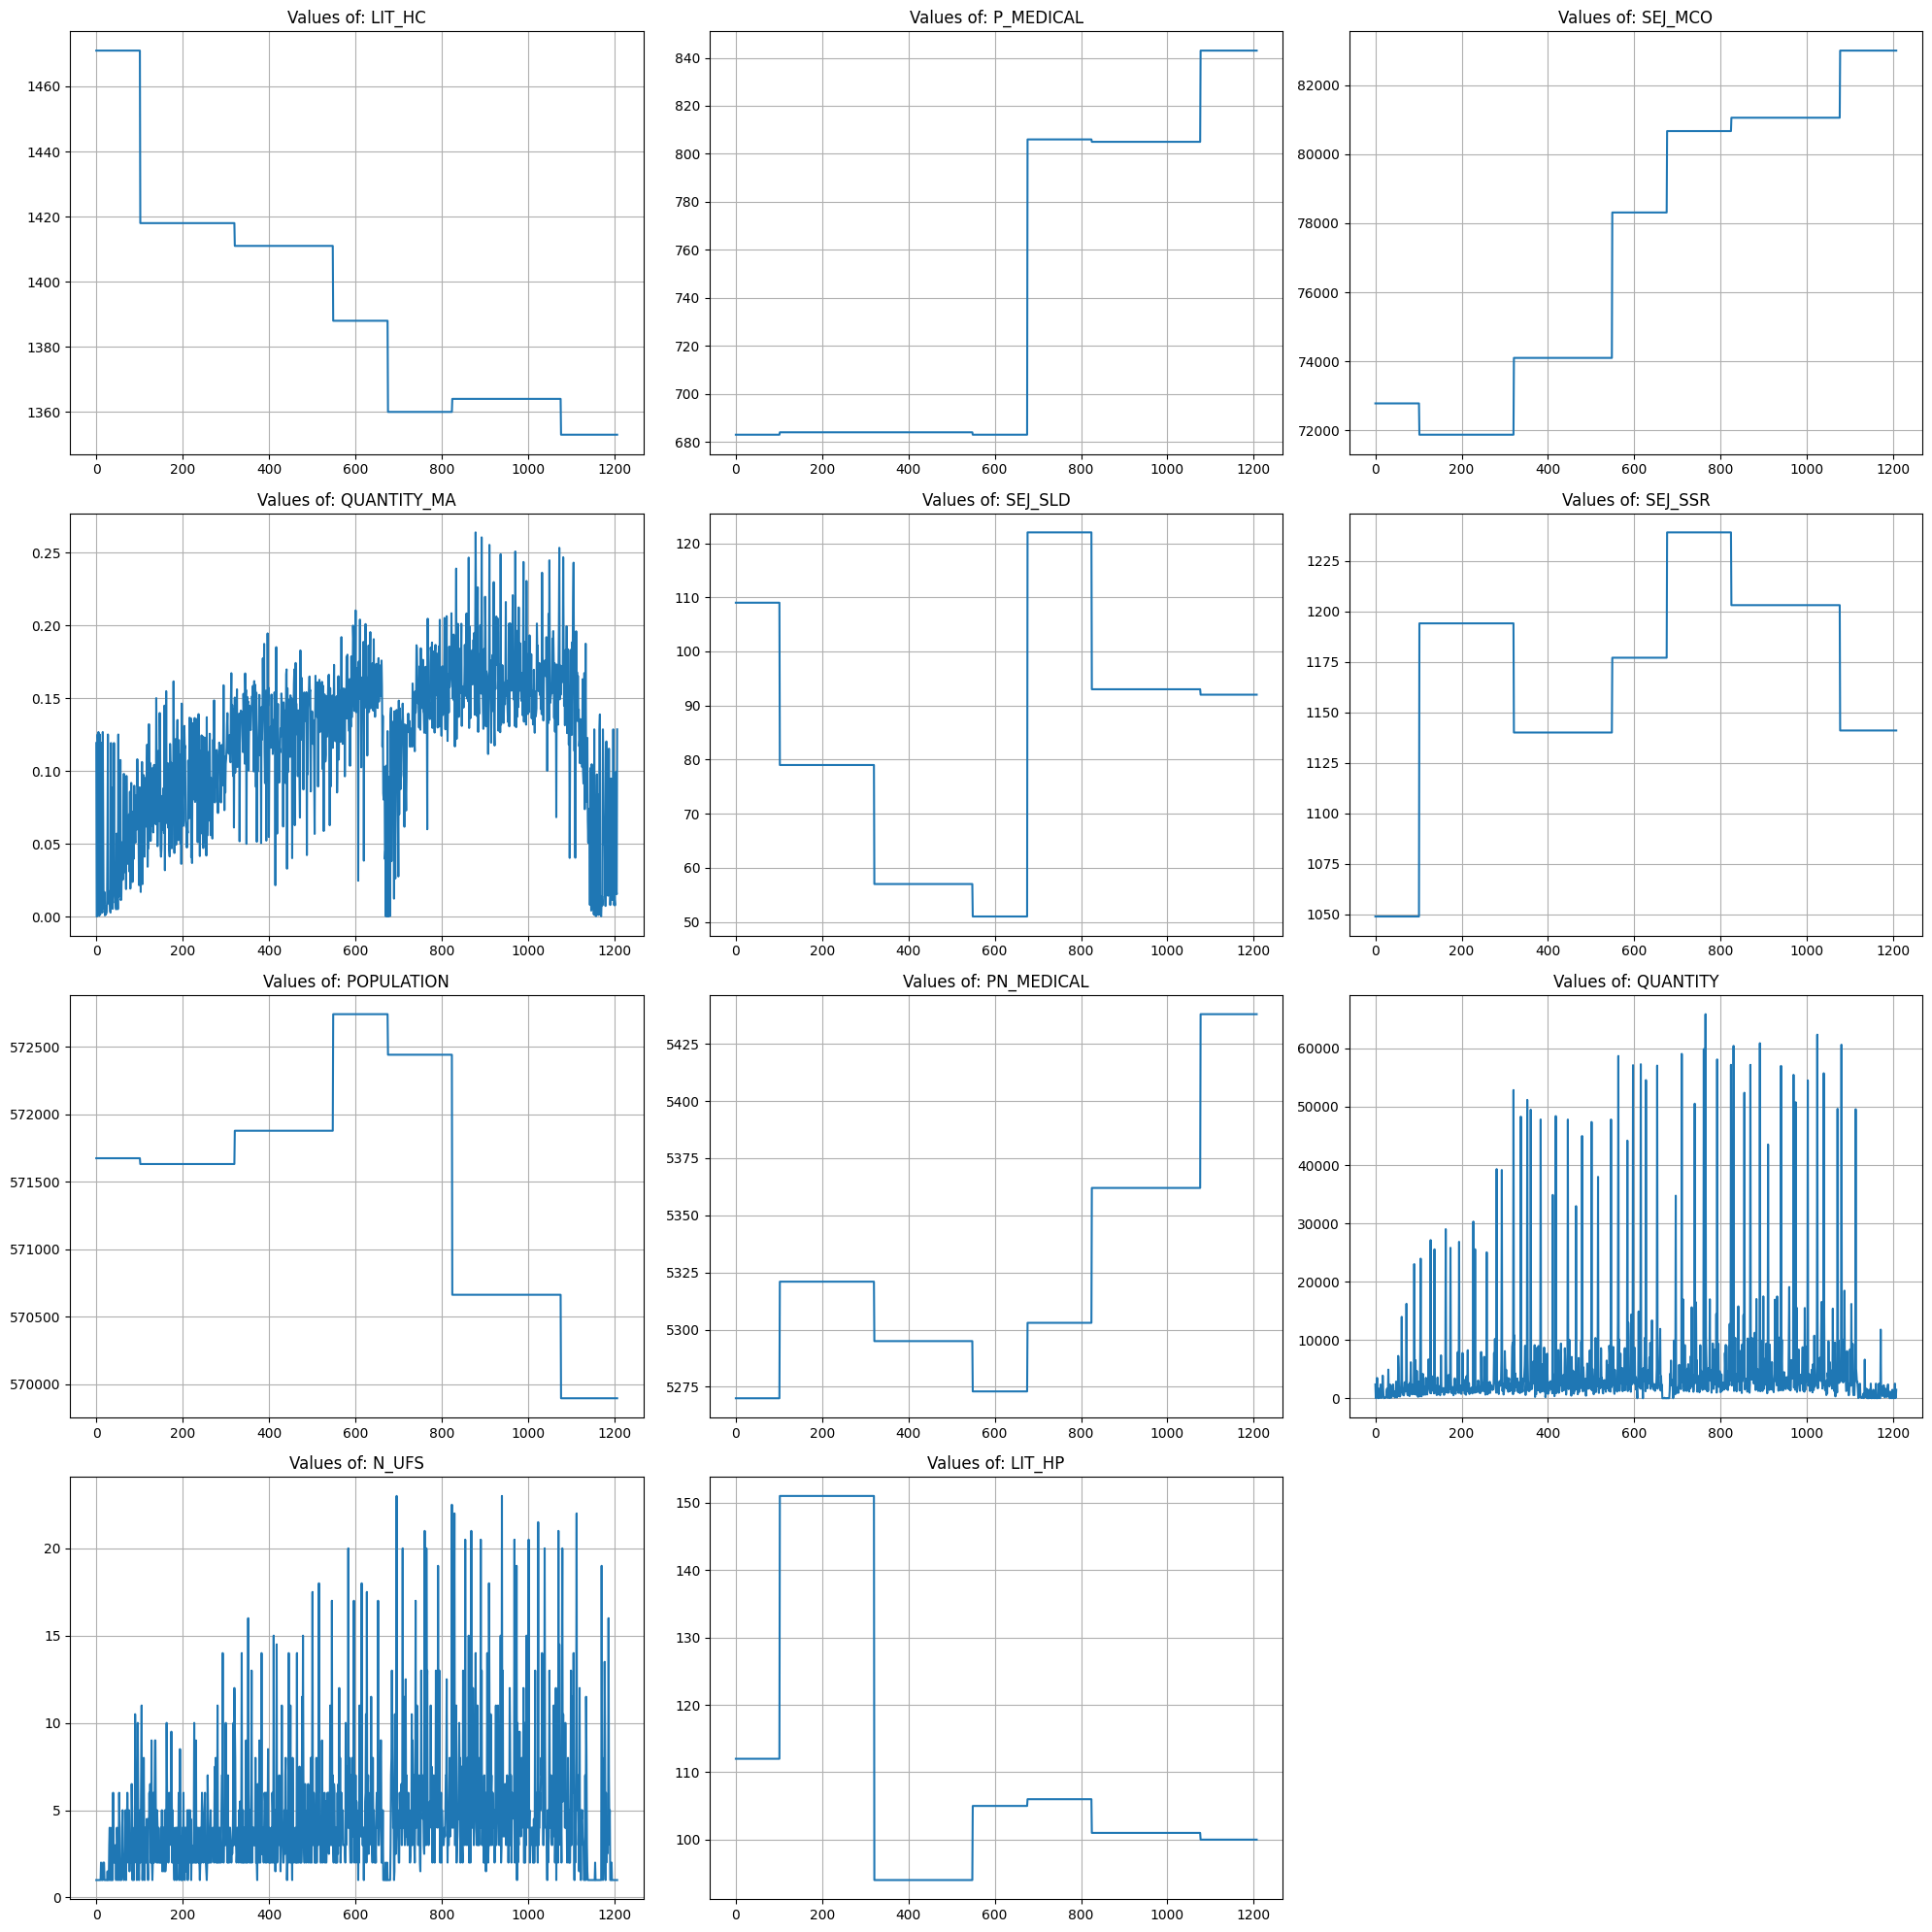

In [ ]:
plot_df(df_h1[features_h1].copy(), n_cols=3)

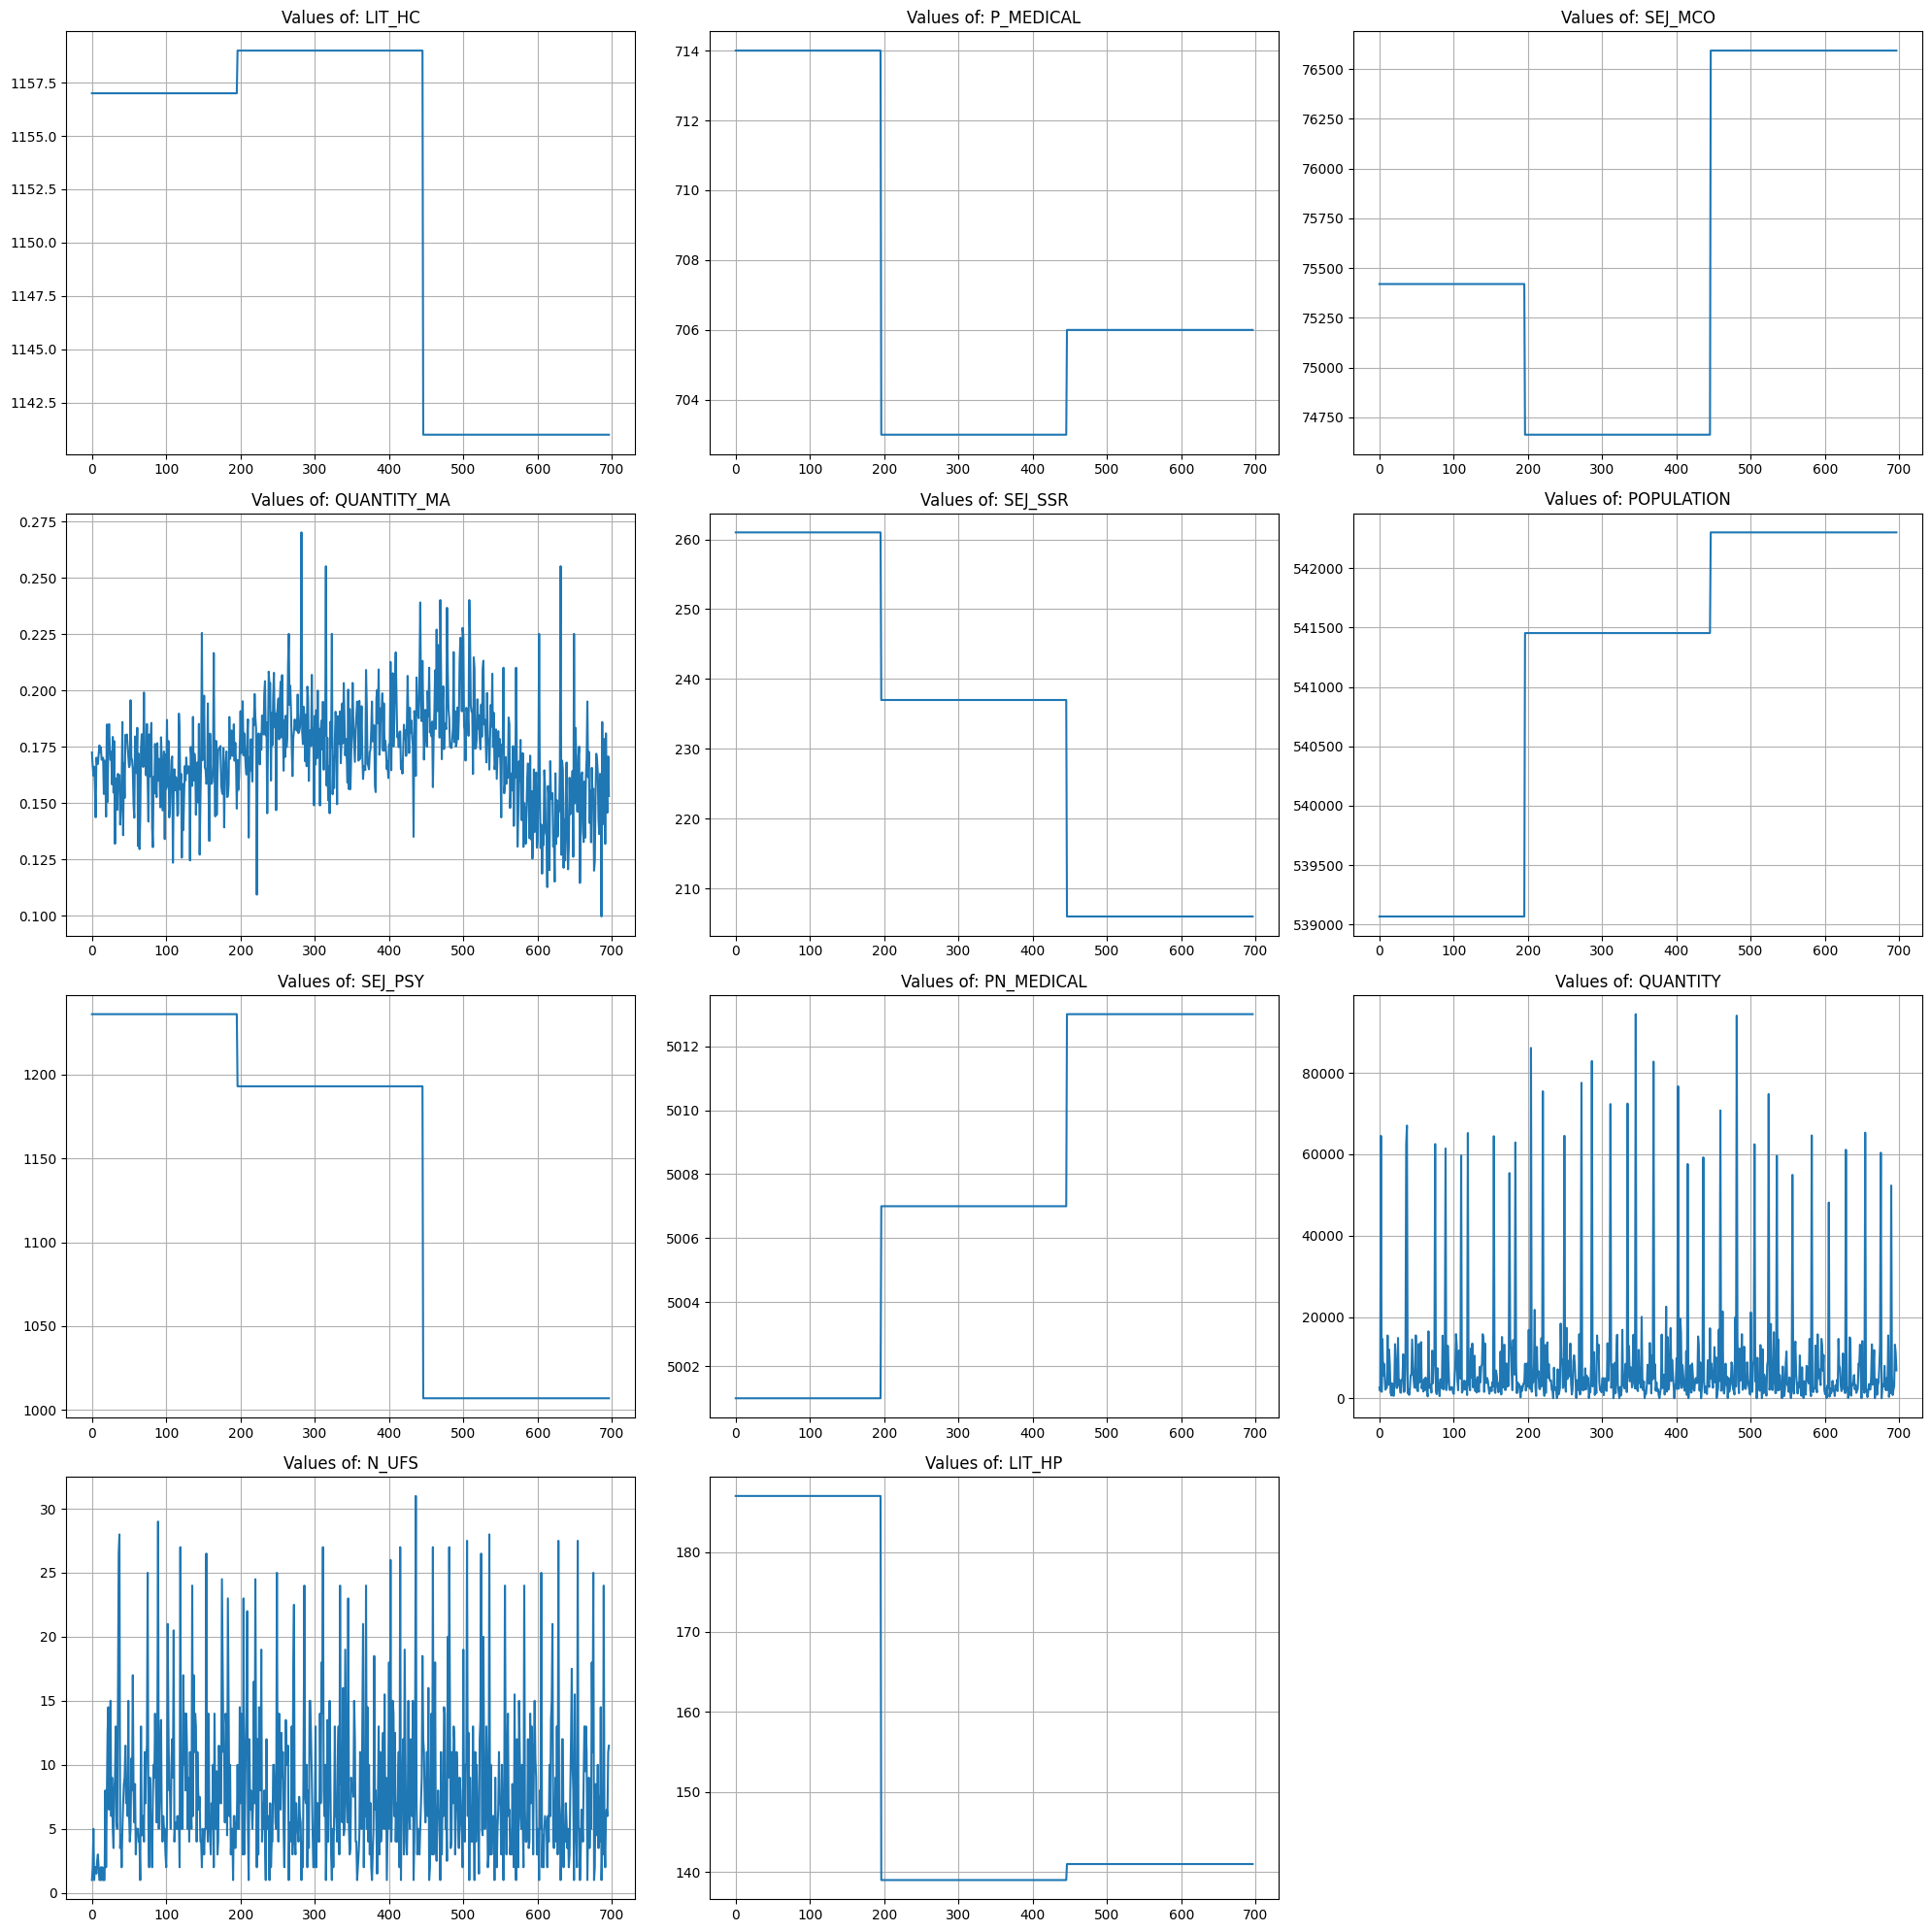

In [ ]:
plot_df(df_h2[features_h2].copy(), n_cols=3)

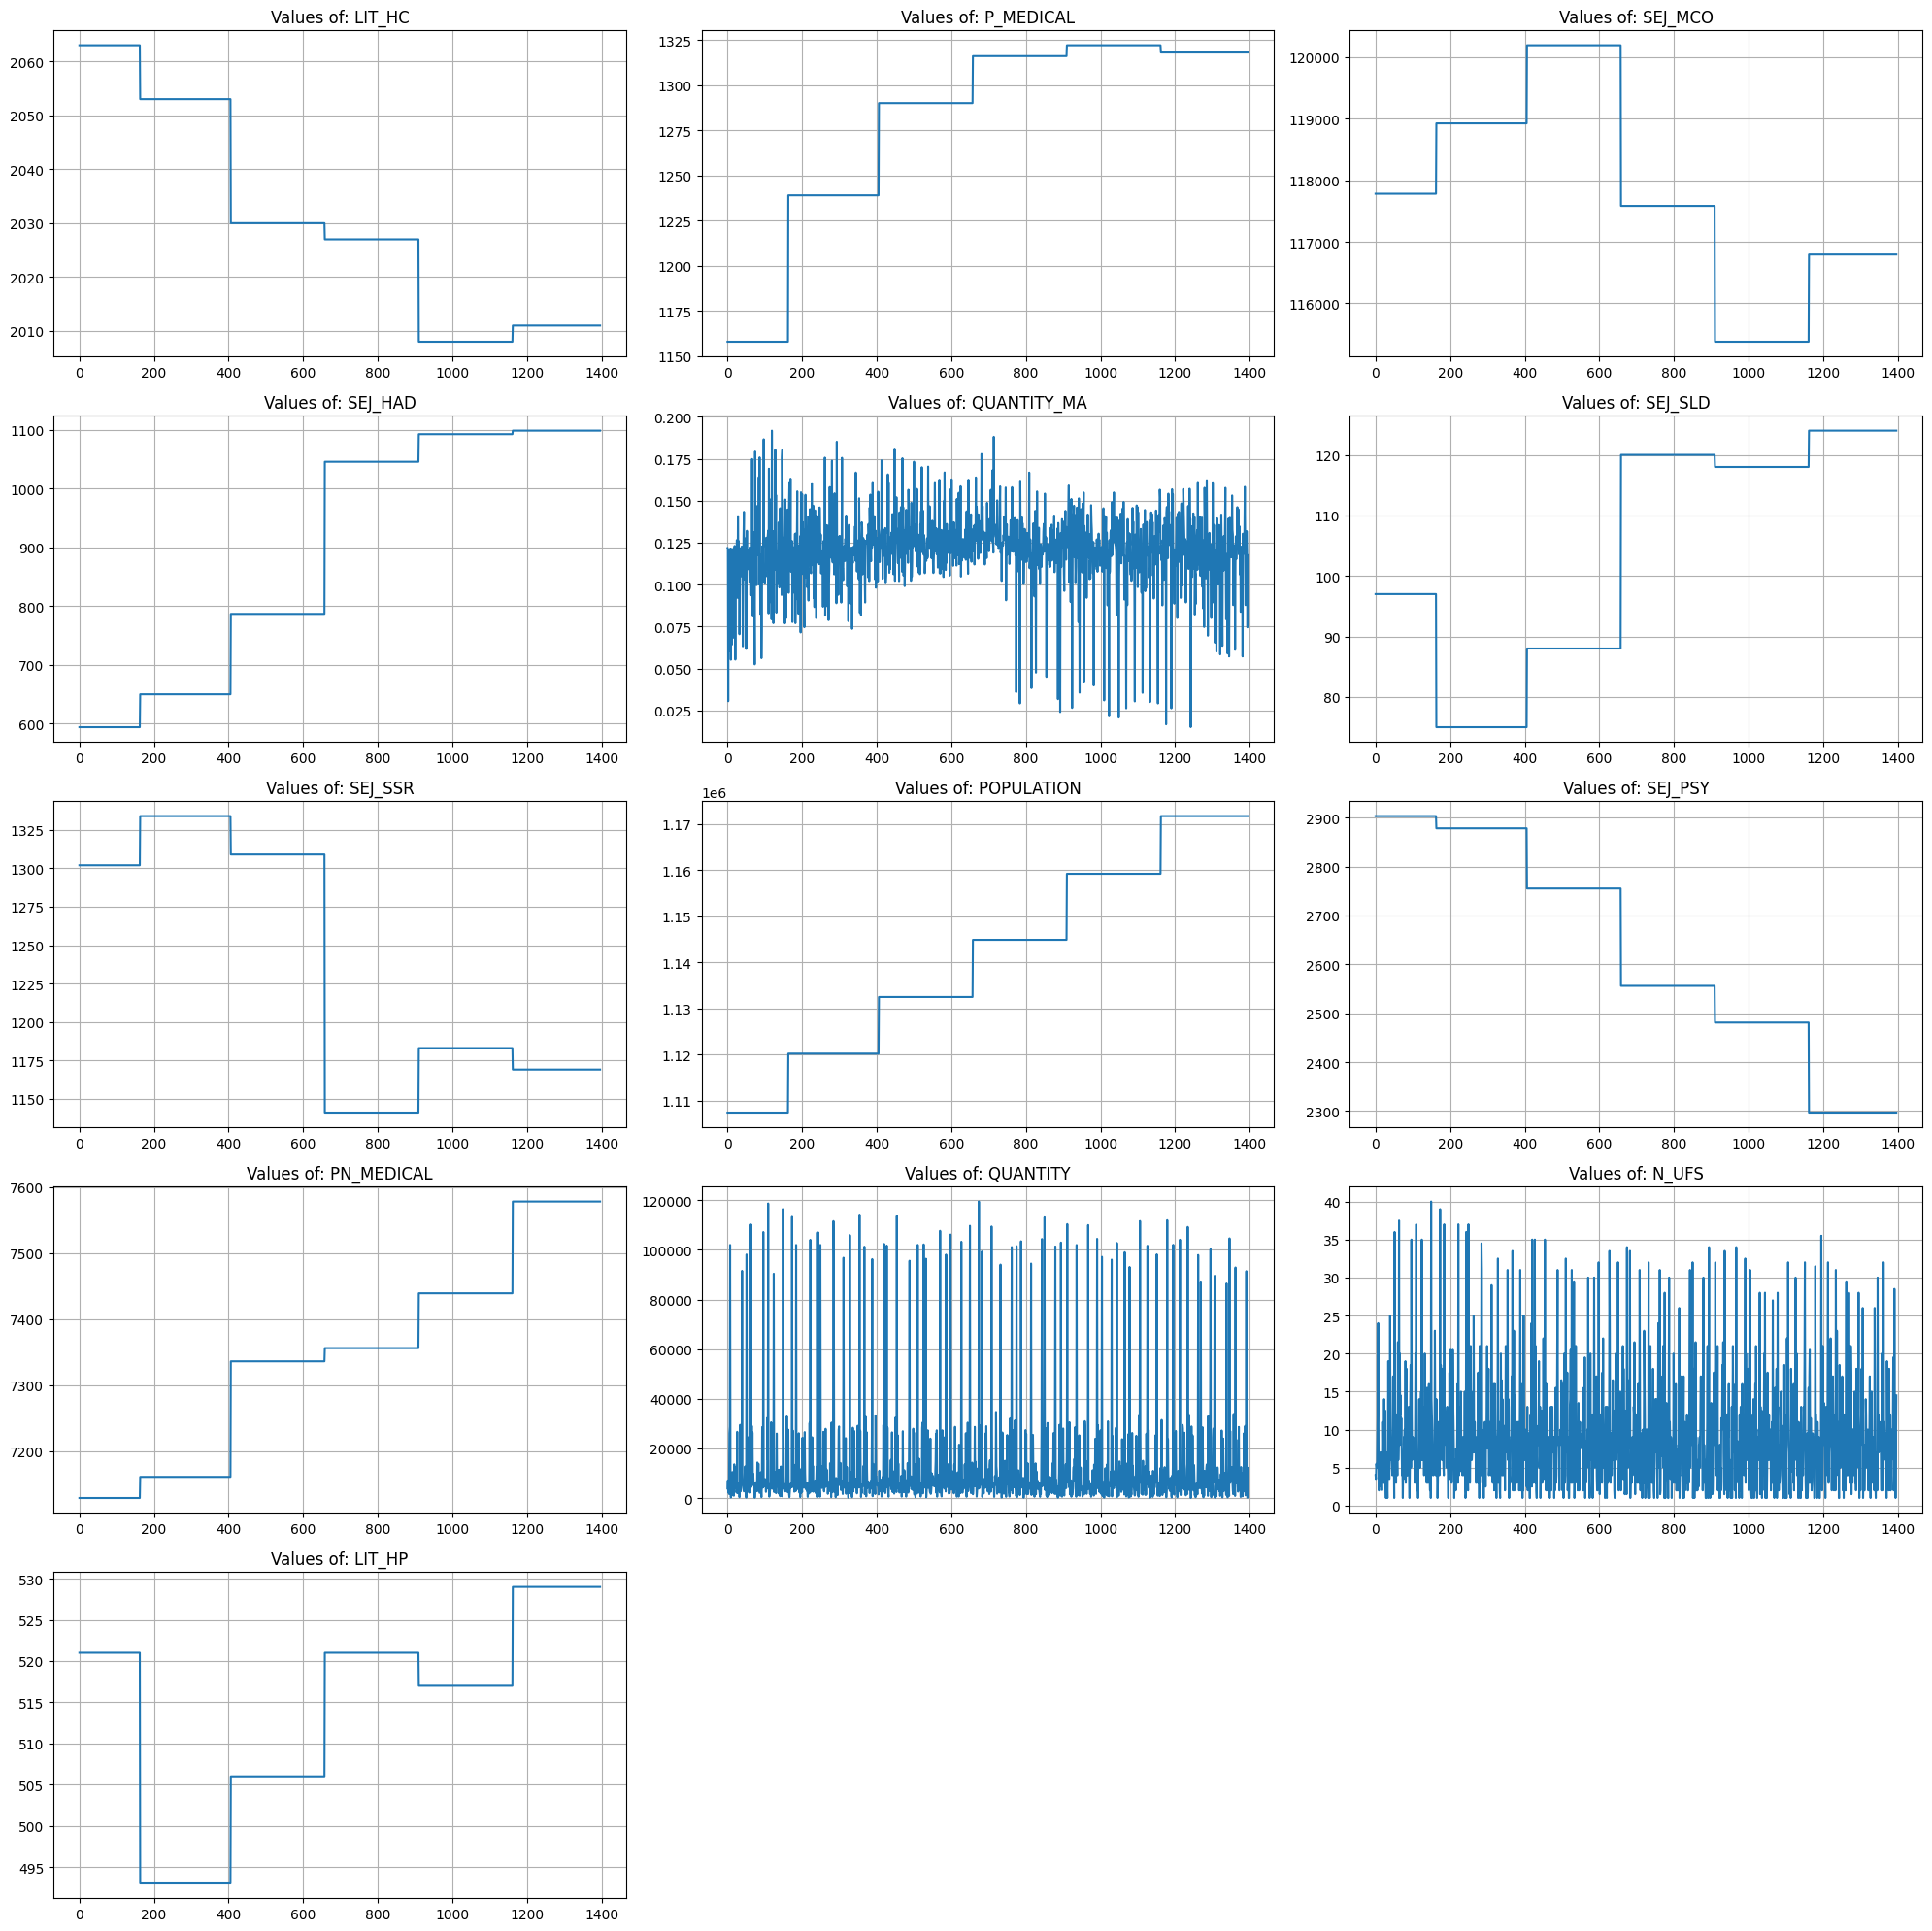

In [ ]:
plot_df(df_h3[features_h3].copy(), n_cols=3)

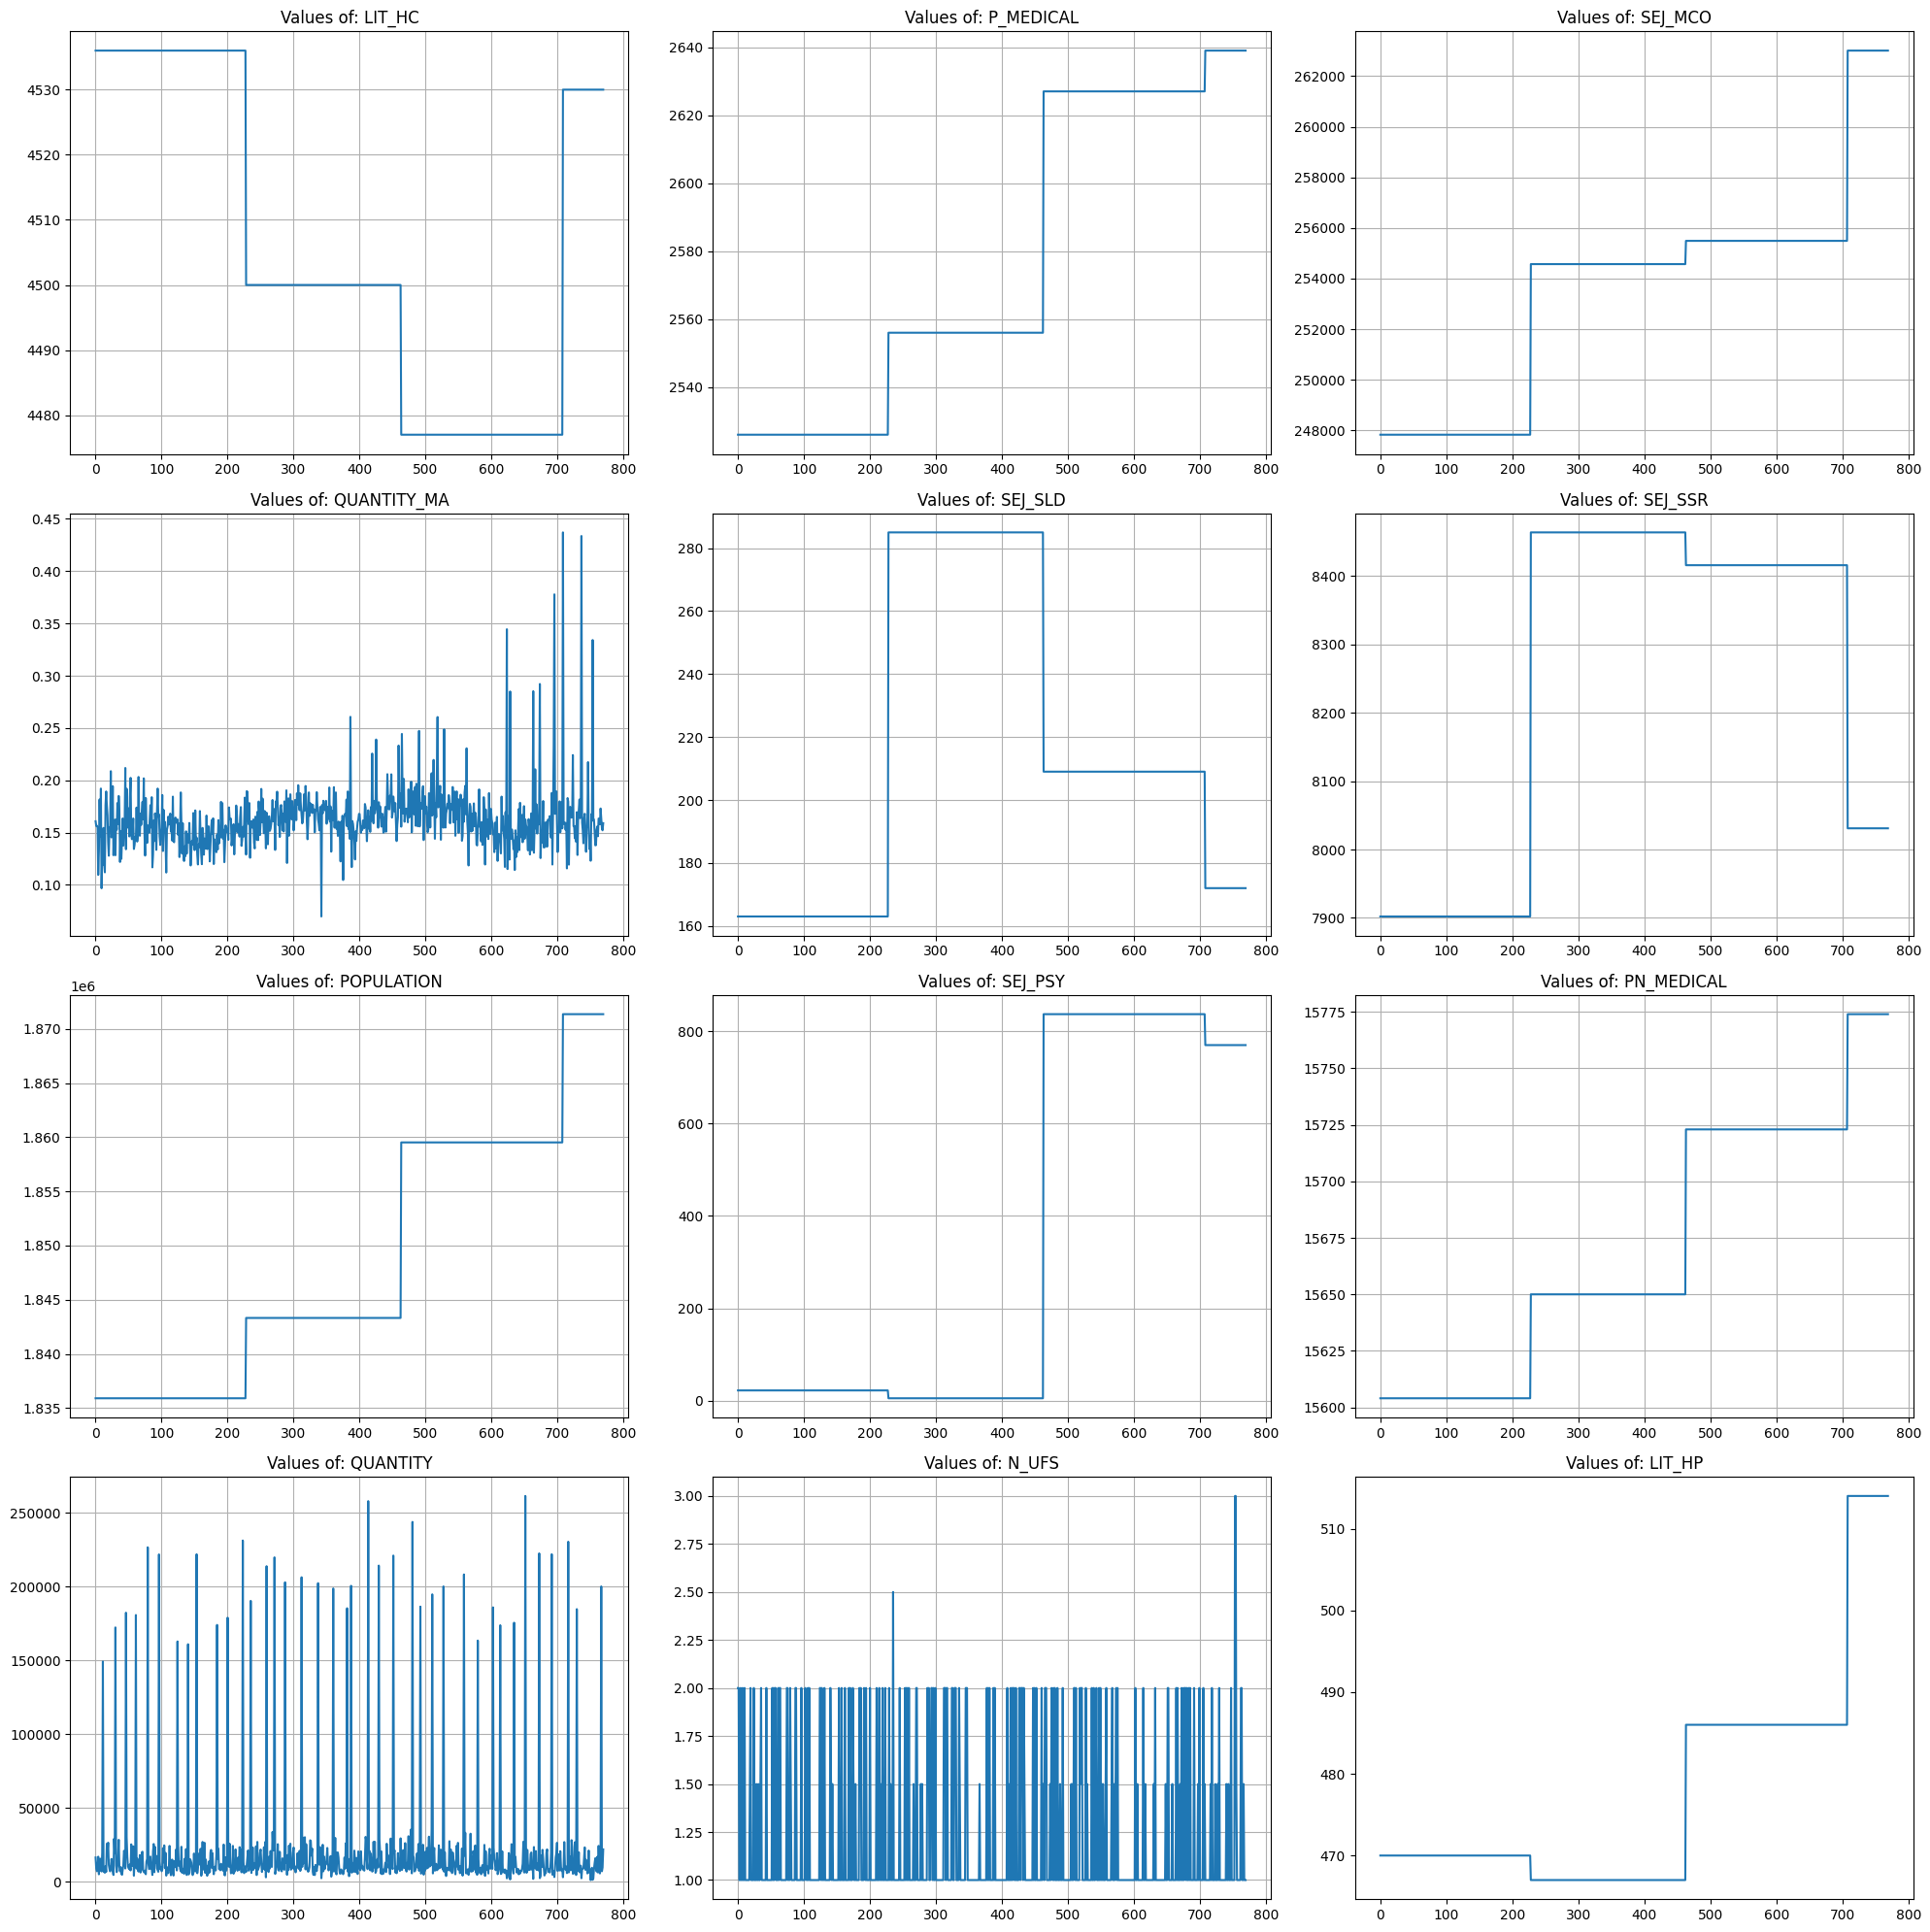

In [ ]:
plot_df(df_h4[features_h4].copy(), n_cols=3)

In [ ]:
def visualize_distribution(df, data_type='numerical', n_cols=3):
    if data_type == 'numerical':
        columns = df.select_dtypes(include=[int, float]).columns
    elif data_type == 'categorical':
        columns = df.select_dtypes(include=[object, 'string']).columns
    else:
        raise ValueError("Invalid data_type parameter. Supported values: 'numerical', 'categorical'")

    if len(columns) == 0:
        raise ValueError("No columns of the specified data type found in the DataFrame.")

    num_features = len(columns)
    n_rows = m.ceil(num_features / n_cols)

    # Handle the case when n_rows or n_cols is 1
    if n_rows == 1:
        fig, axes = plt.subplots(n_rows, n_cols, sharex=False, figsize=(20, 10))
        axes = [axes]  # Wrap the single axis in a list
    elif n_cols == 1:
        fig, axes = plt.subplots(n_rows, n_cols, sharex=False, figsize=(10, 20))
        axes = [[ax] for ax in axes]  # Convert each axis to a list
    else:
        fig, axes = plt.subplots(n_rows, n_cols, sharex=False, figsize=(20, 20))

    # Set a predefined color palette
    palette = sns.color_palette("Set3", n_colors=num_features)

    for i, column in enumerate(columns):
        ax = axes[i // n_cols][i % n_cols]  # Access the axis correctly
        if data_type == 'numerical':
            sns.histplot(df[column], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax)
        elif data_type == 'categorical':
            sns.countplot(x=column, data=df, ax=ax, palette=[palette[i]])
            ax.tick_params(axis='x', rotation=45)
        ax.set(title='Distribution of: ' + str(column))

    # Remove empty subplots
    if num_features < n_rows * n_cols:
        for i in range(num_features, n_rows * n_cols):
            fig.delaxes(axes[i // n_cols][i % n_cols])

    plt.tight_layout()
    plt.show()

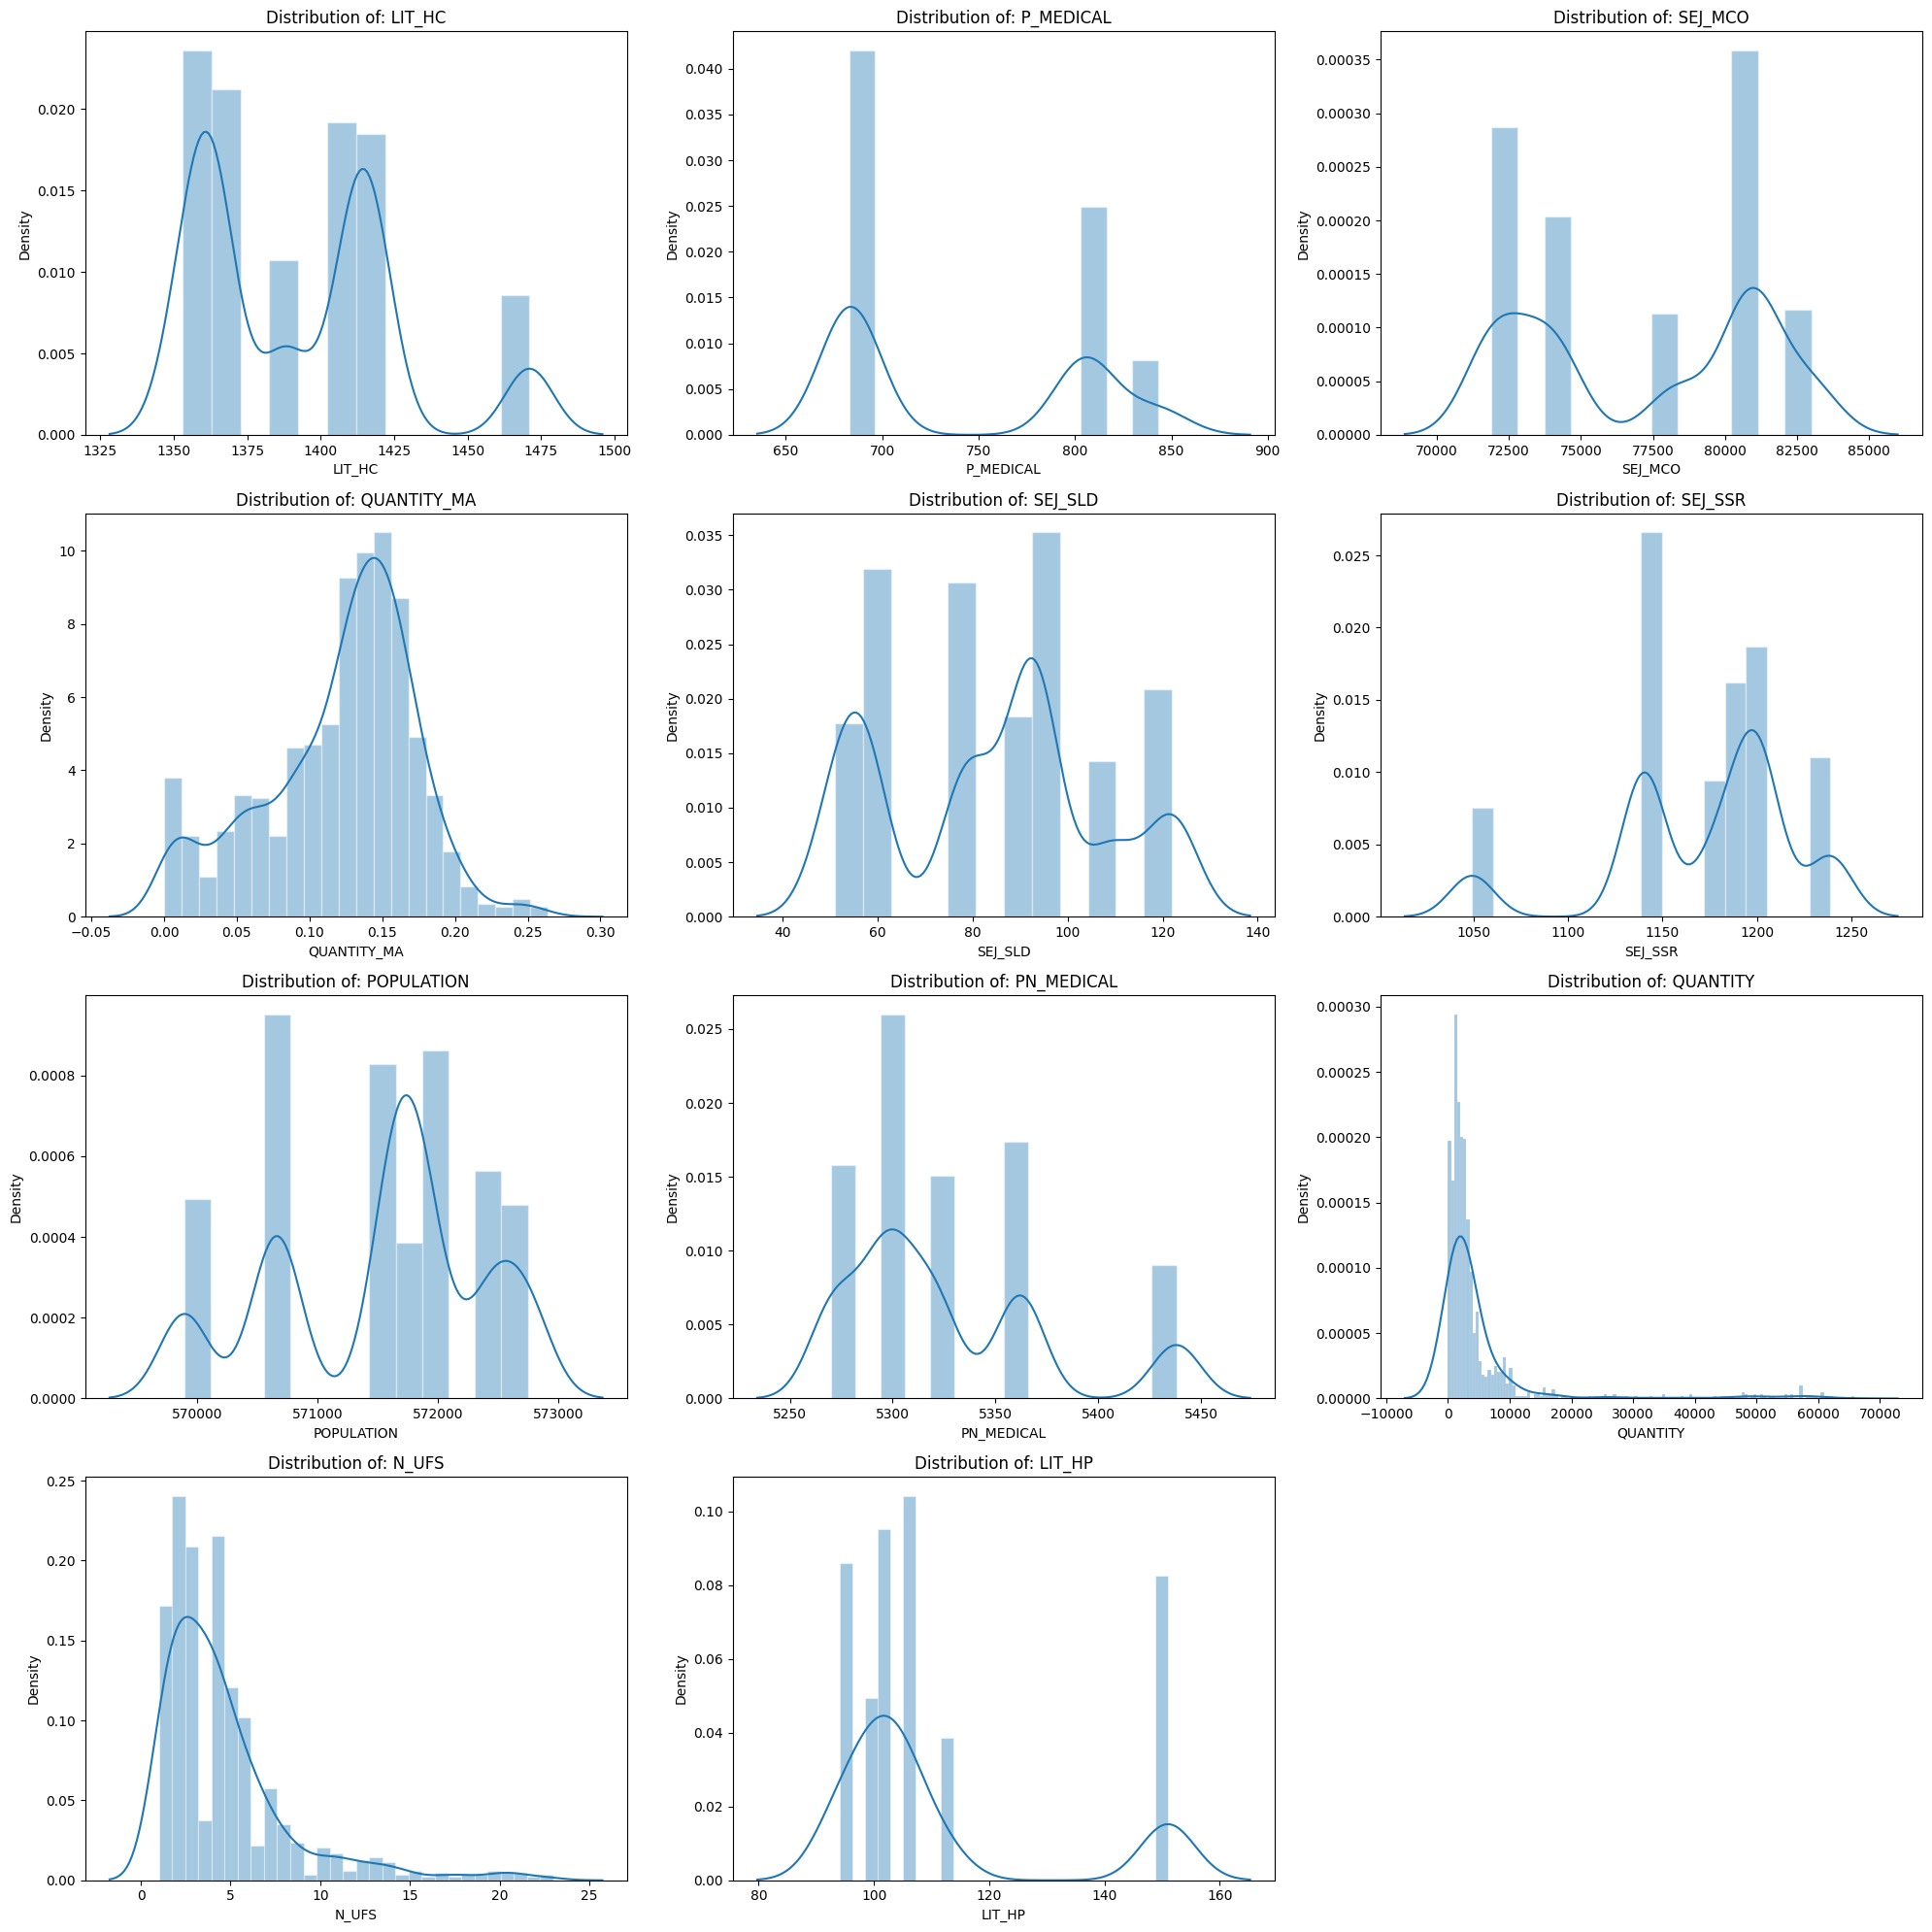

In [ ]:
visualize_distribution(df_h1[features_h1].copy())

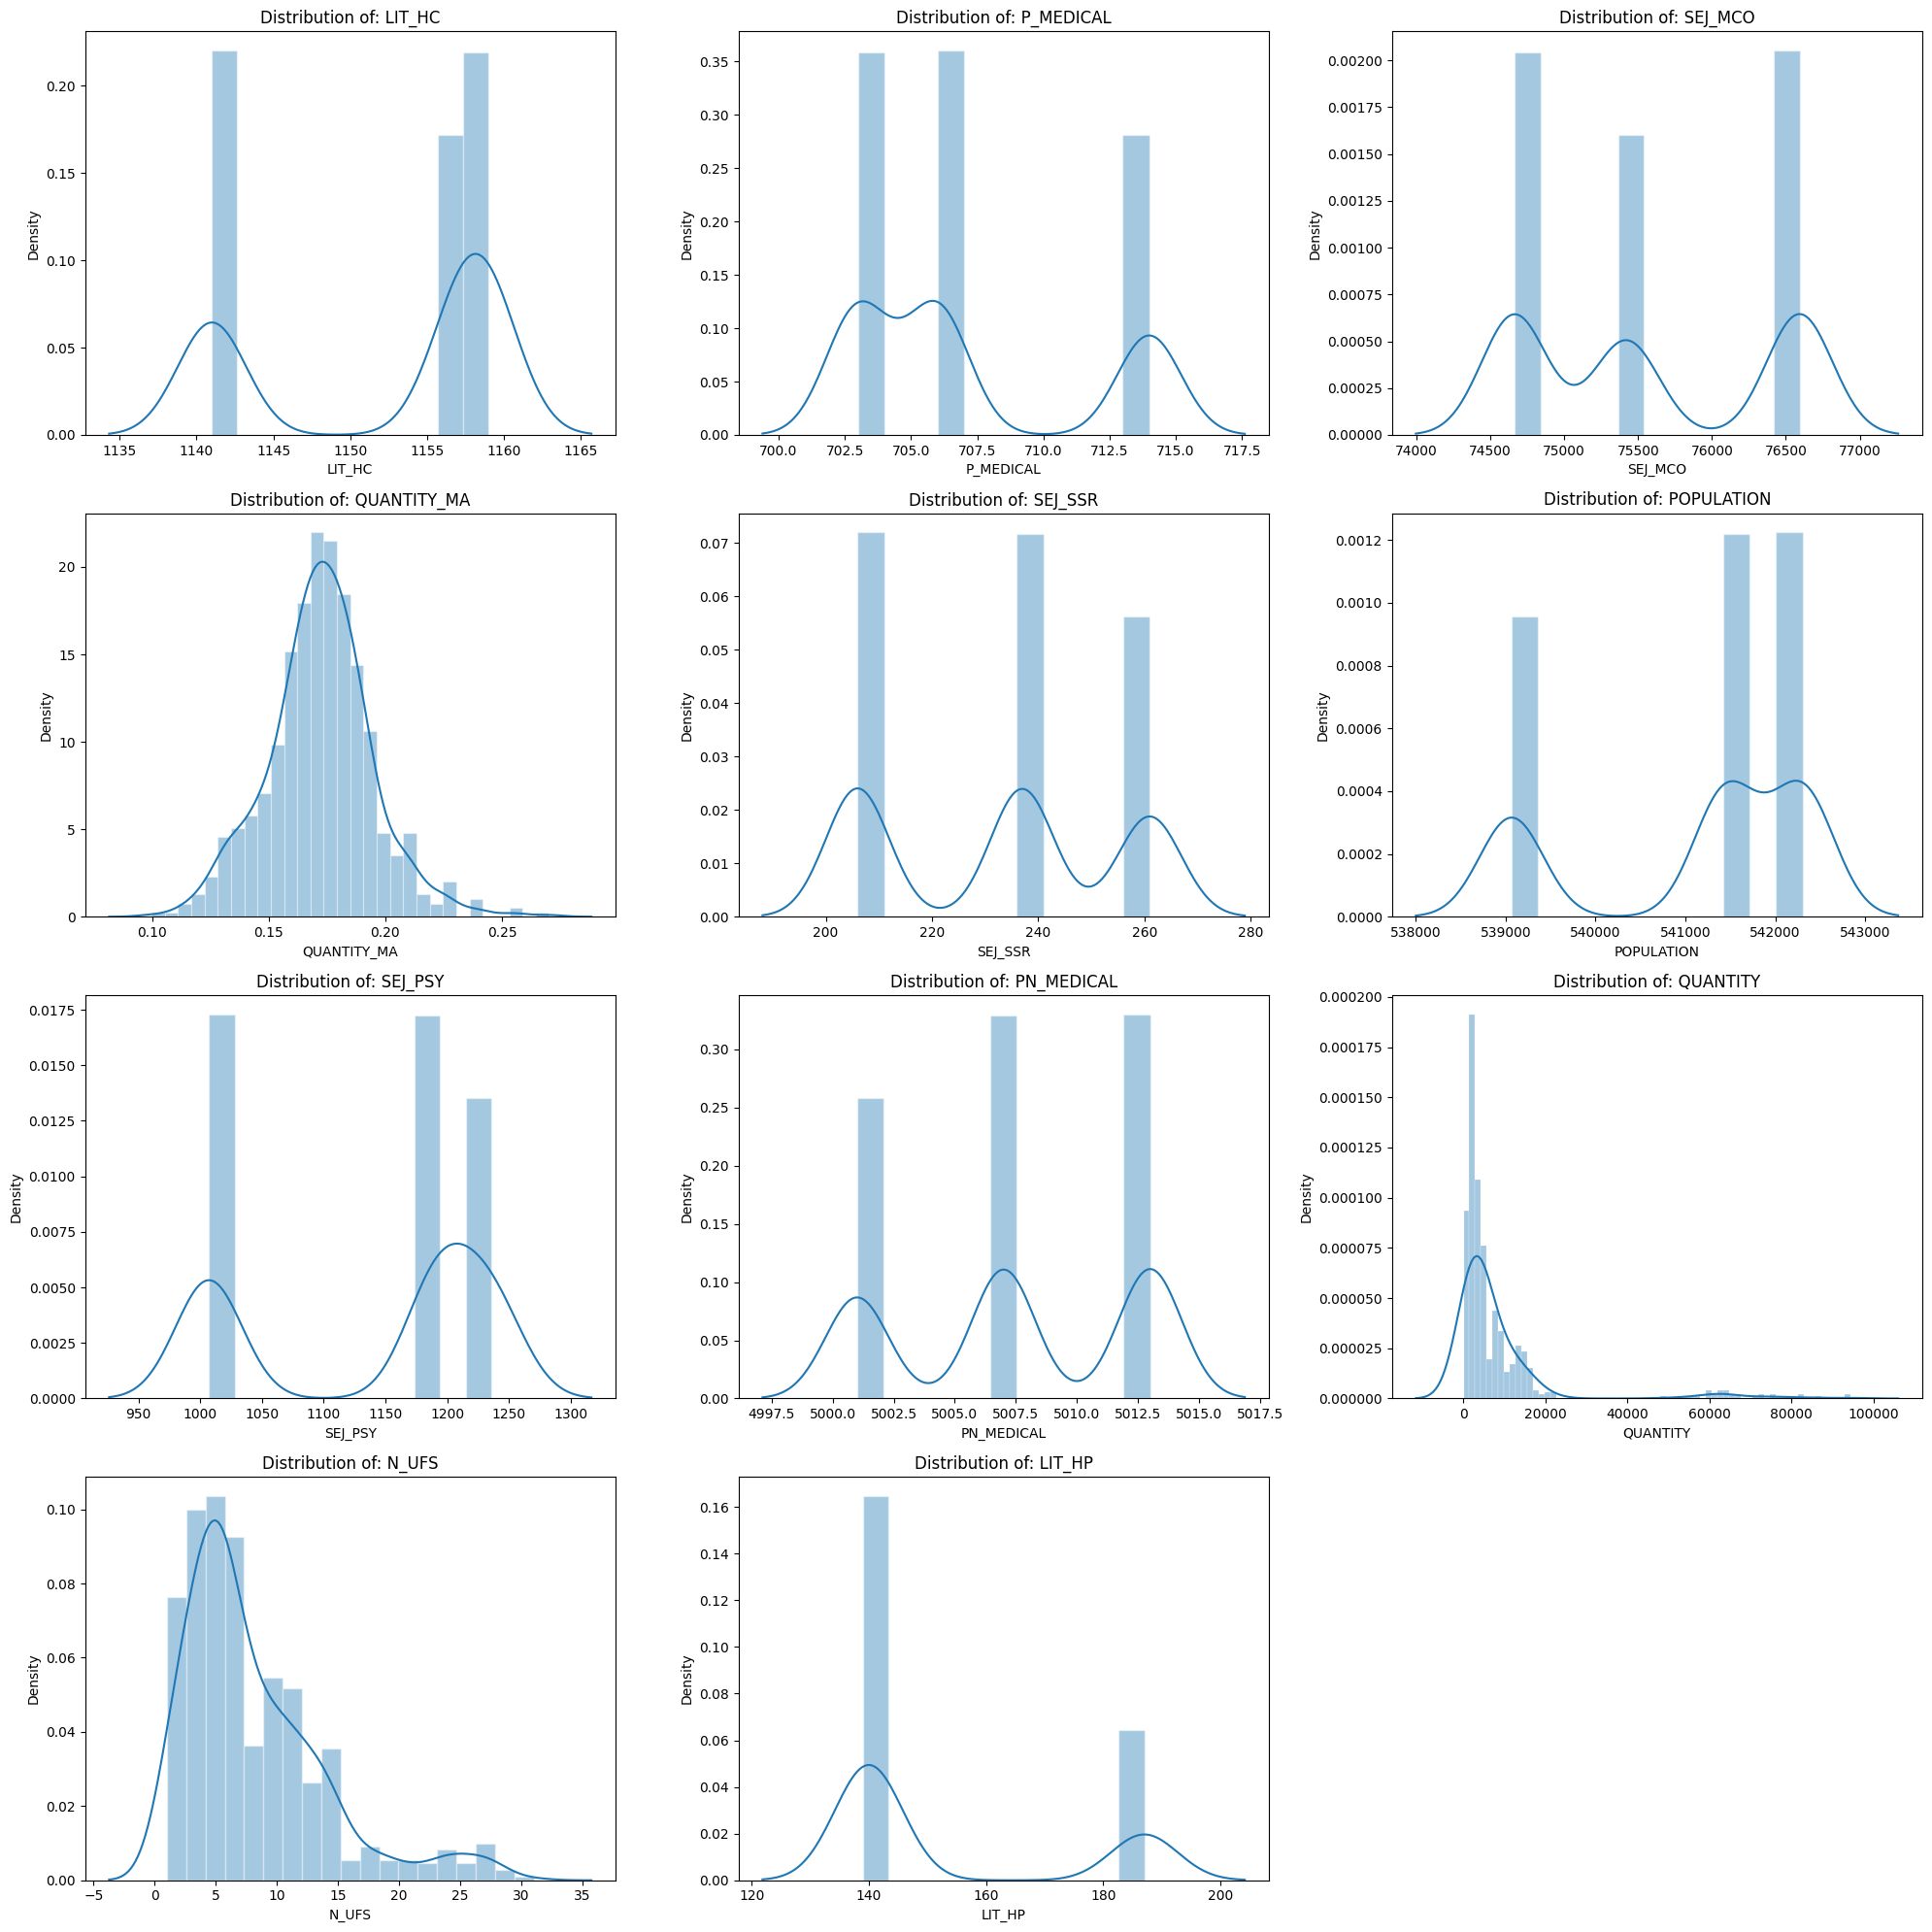

In [ ]:
visualize_distribution(df_h2[features_h2].copy(), n_cols=3)

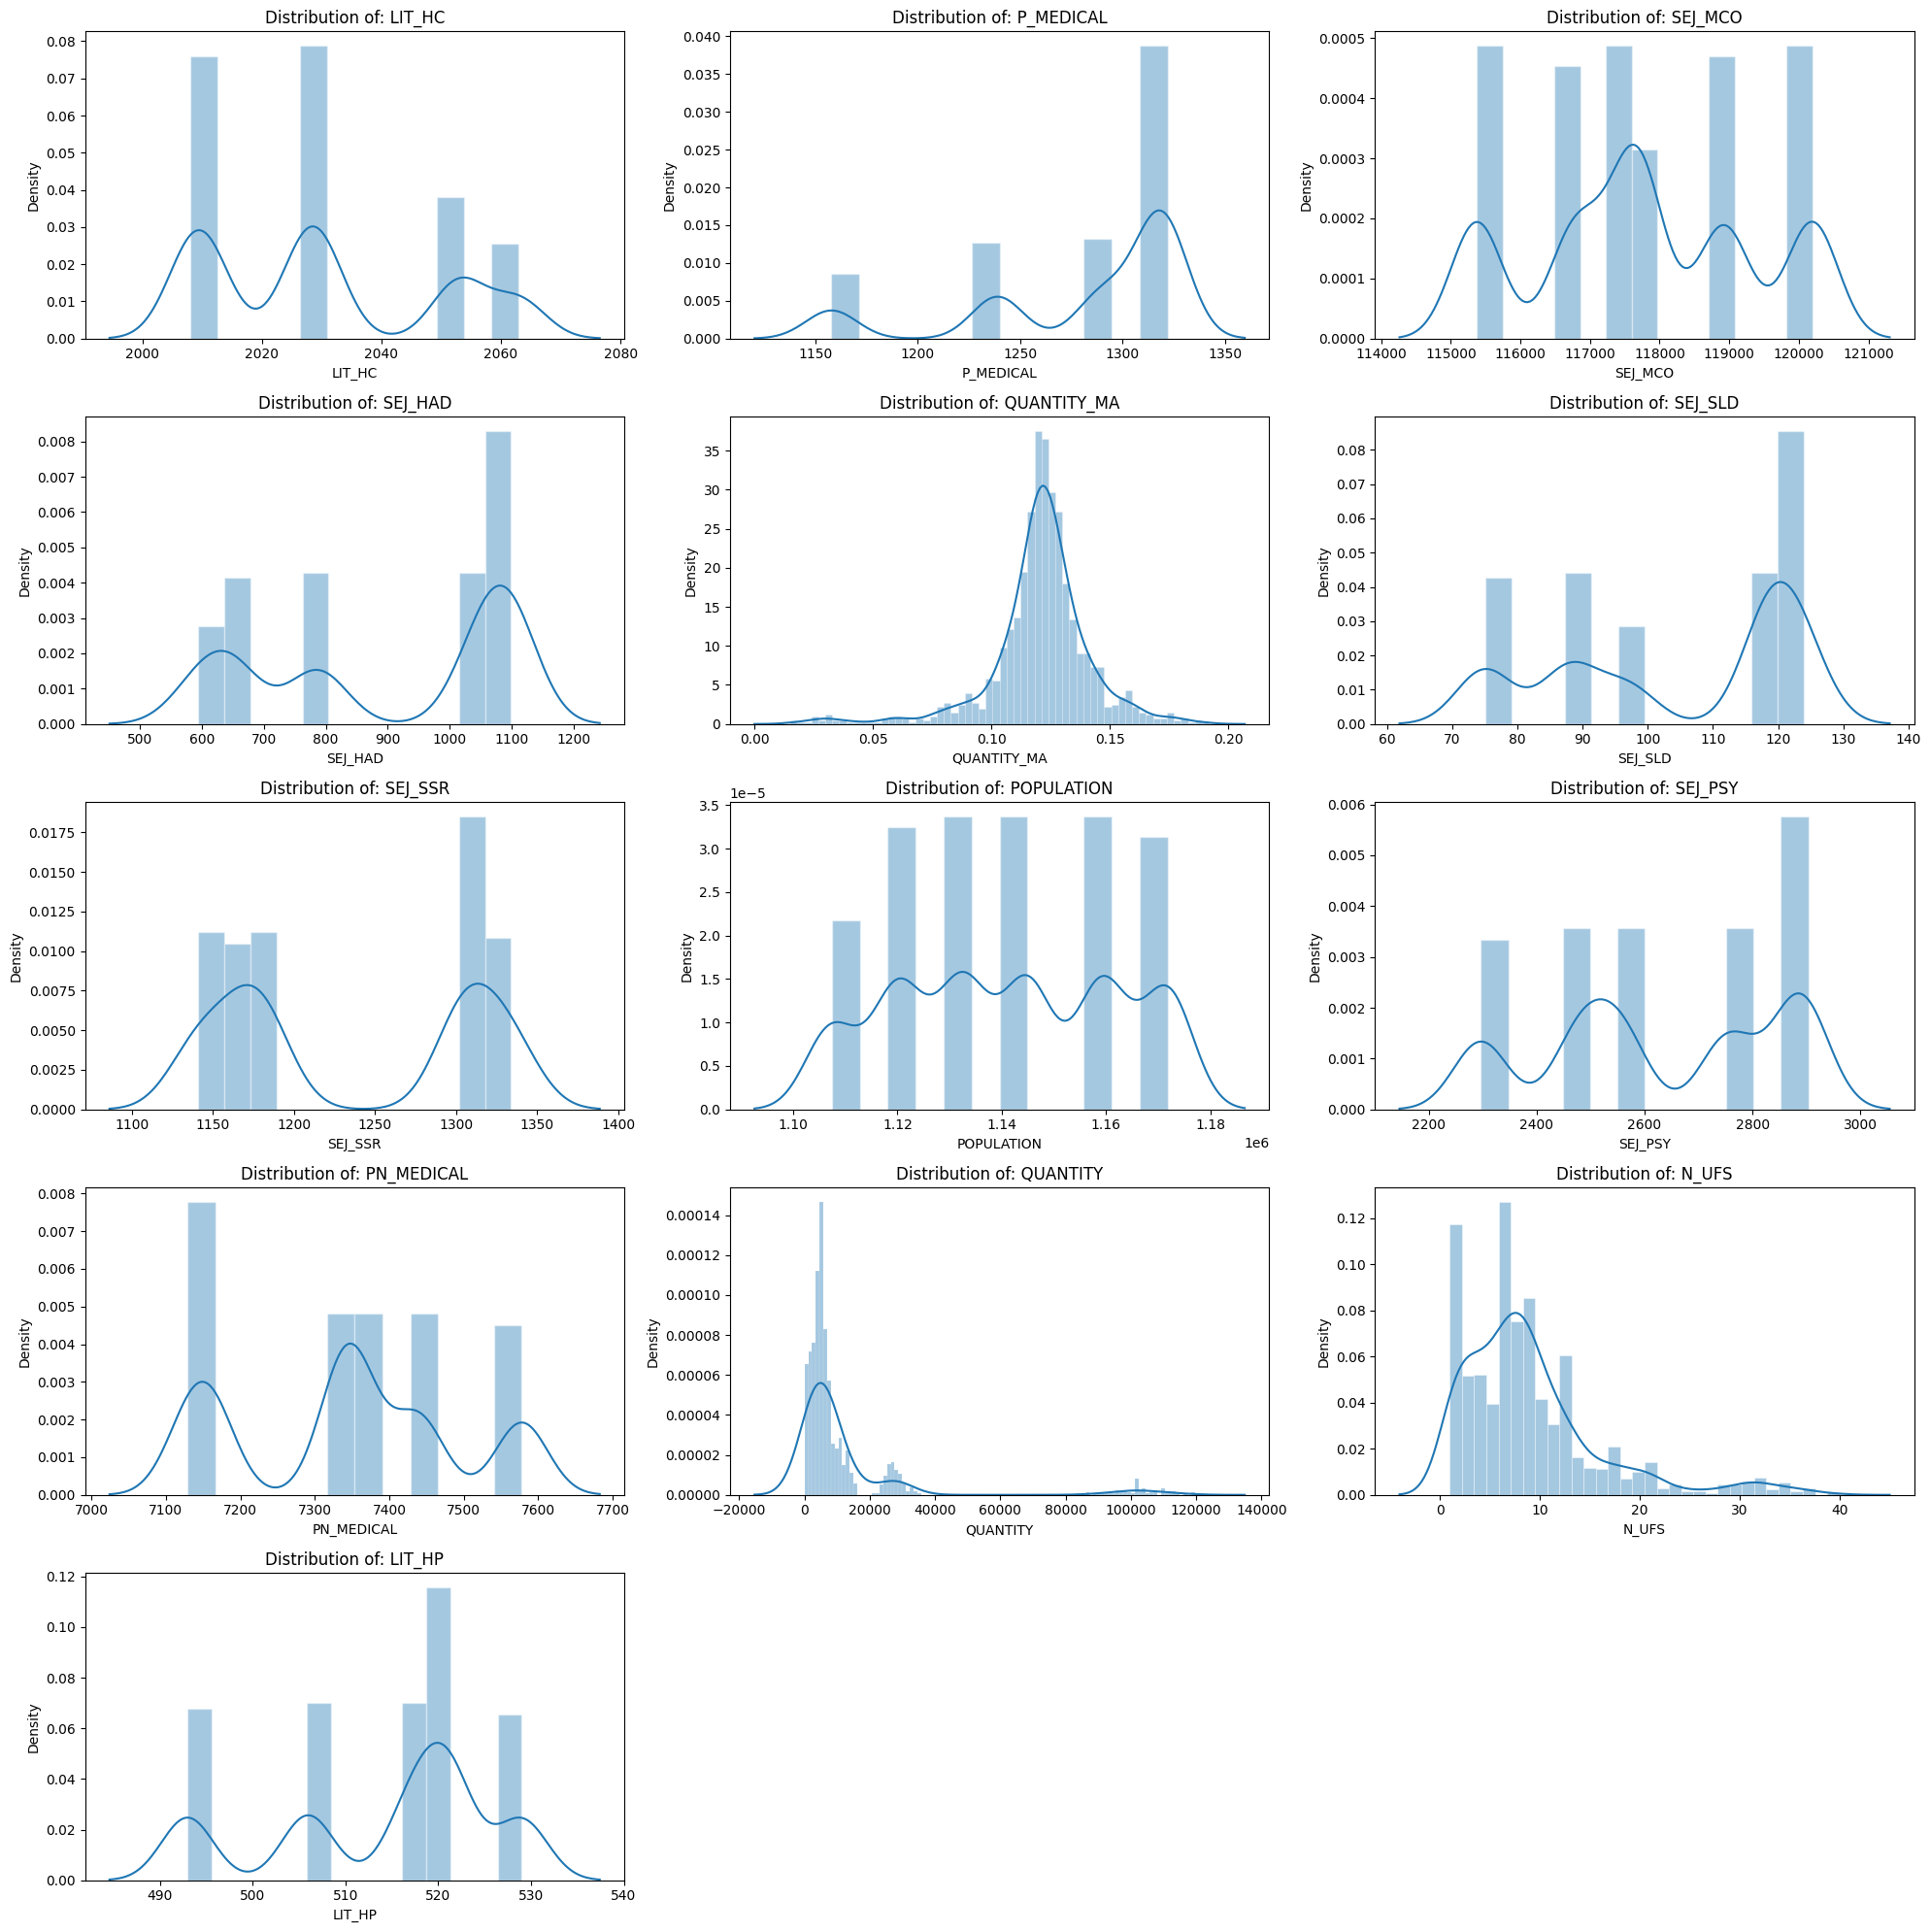

In [ ]:
visualize_distribution(df_h3[features_h3].copy(), n_cols=3)

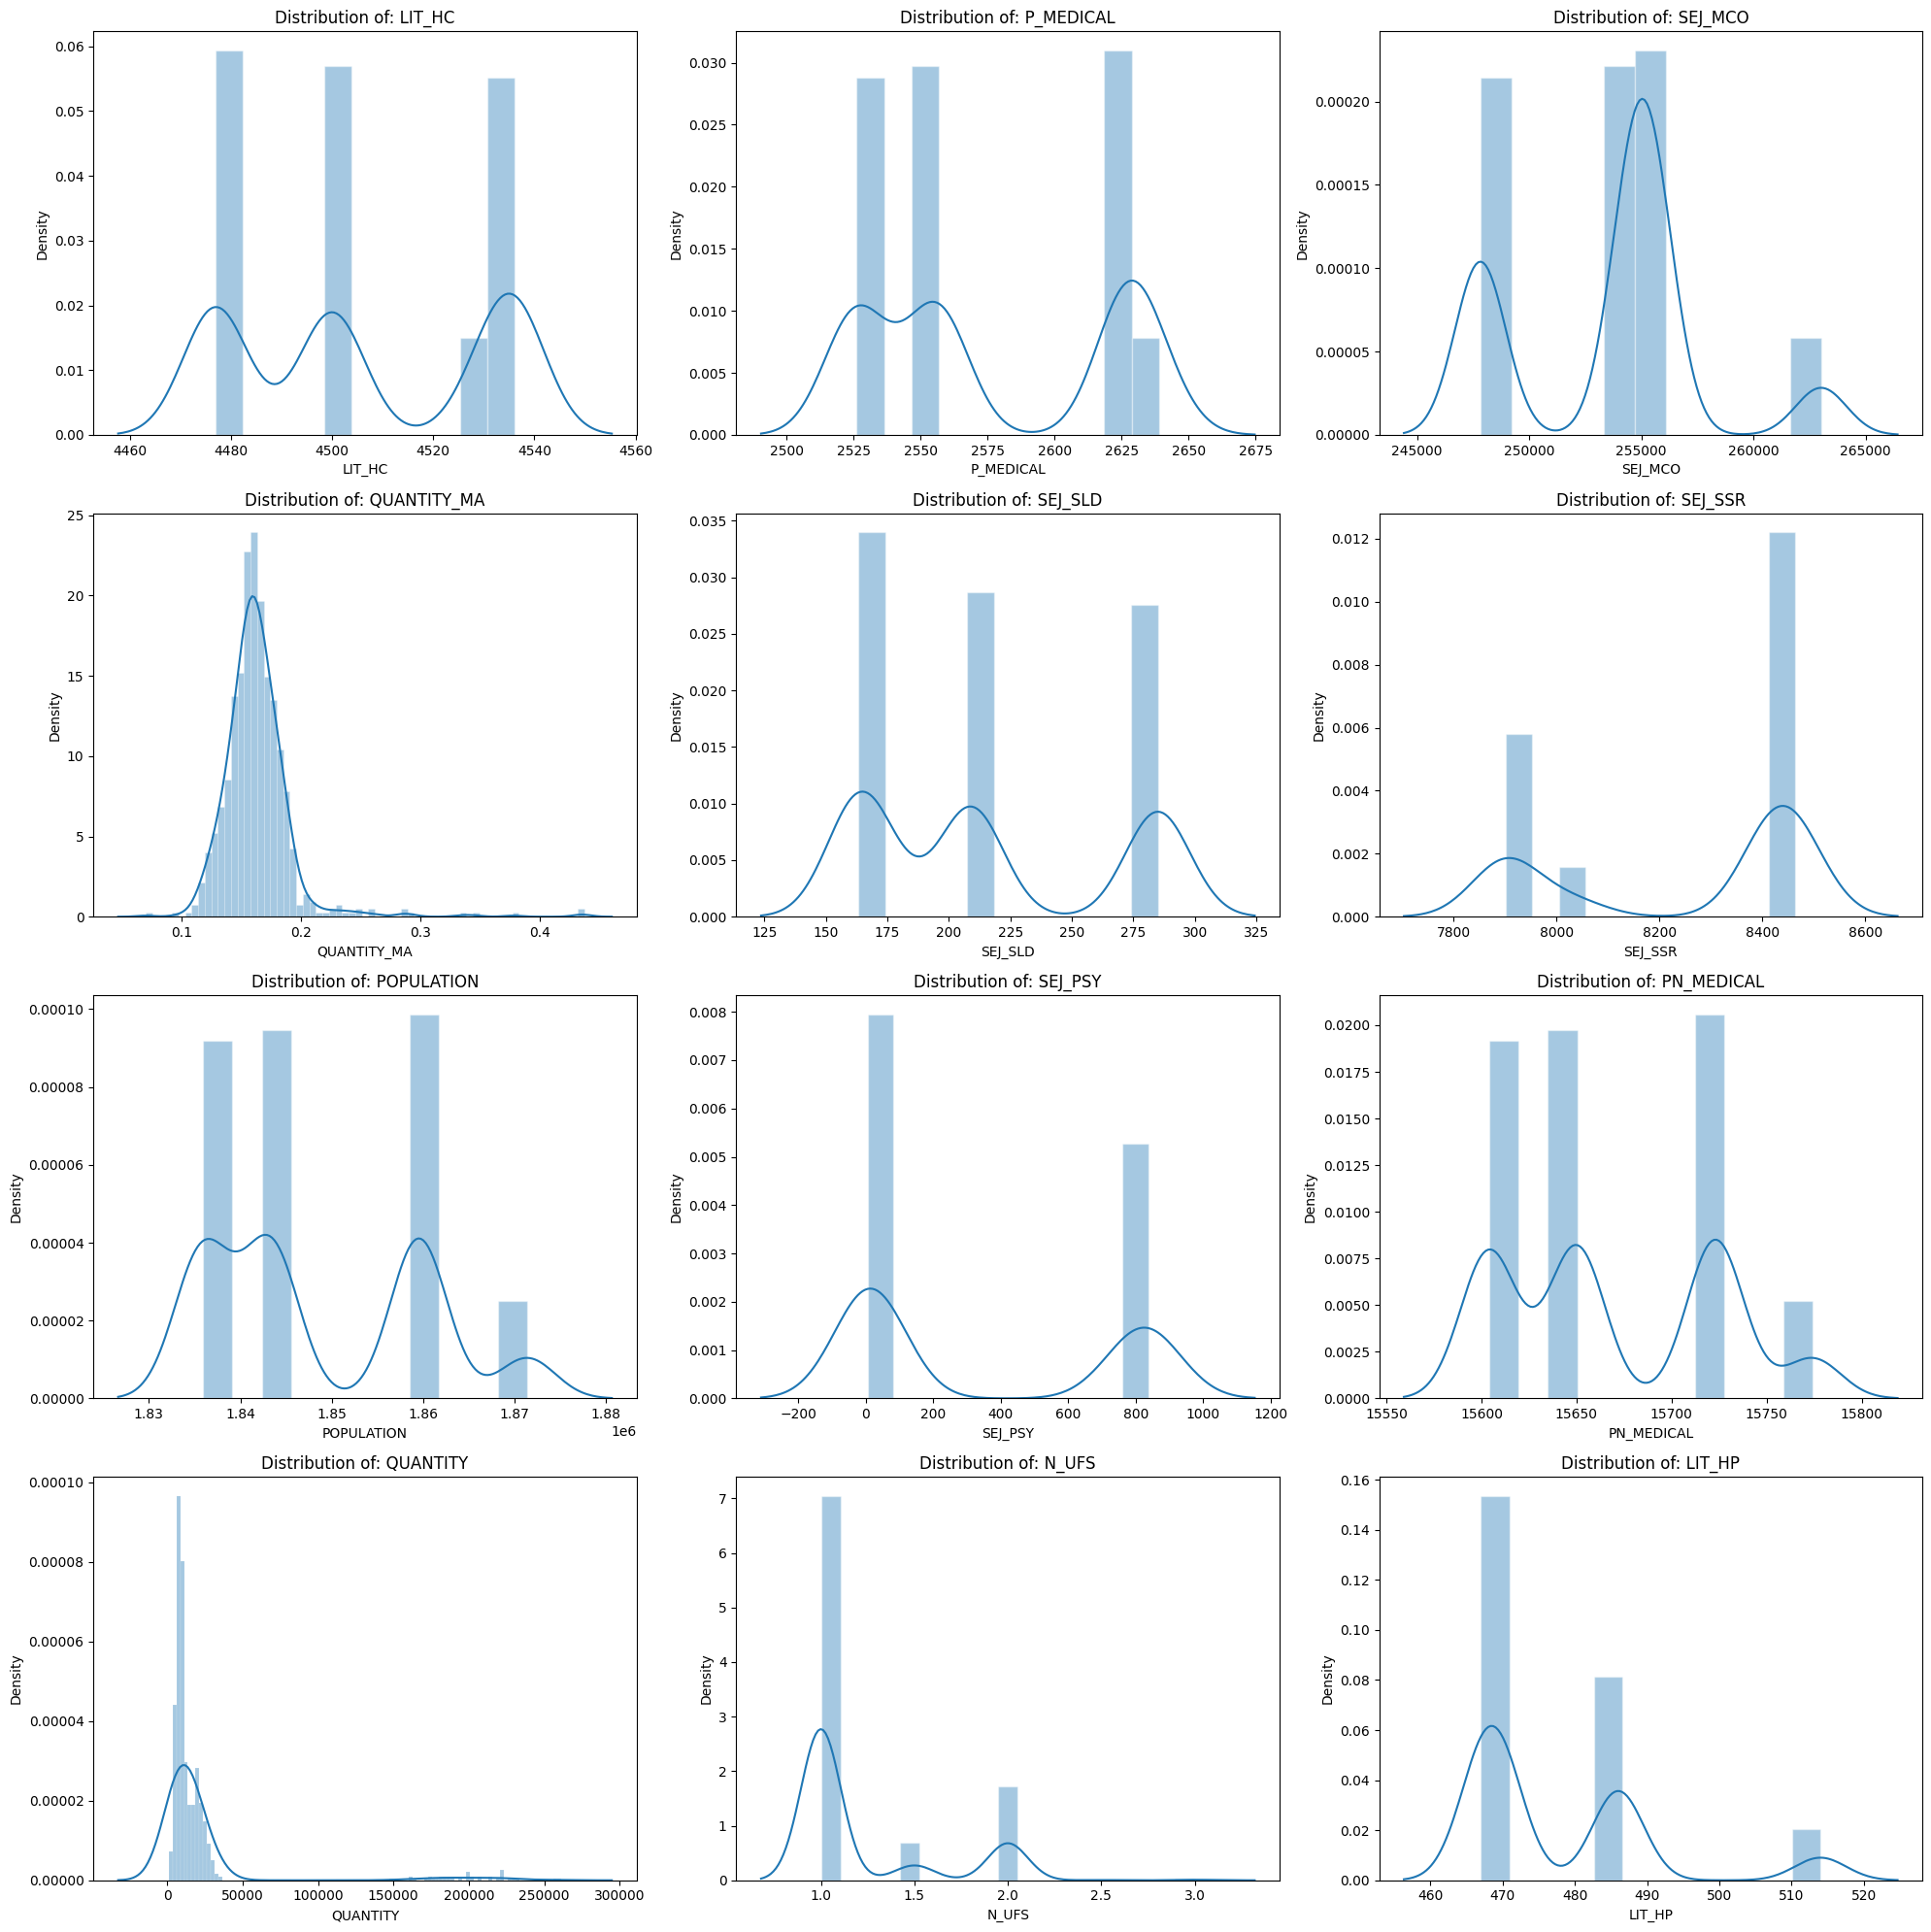

In [ ]:
visualize_distribution(df_h4[features_h4].copy(), n_cols=3)

## 4.1 - Train, Test split

In [138]:
X_h1 = df_h1[features_h1].copy().drop(["QUANTITY", "QUANTITY_MA"],axis=1).values
scaler = StandardScaler()
X_h1_scaled = scaler.fit_transform(X_h1)

X_h2 = df_h2[features_h2].copy().drop(["QUANTITY", "QUANTITY_MA"],axis=1).values
scaler = StandardScaler()
X_h2_scaled = scaler.fit_transform(X_h2)

X_h3 = df_h3[features_h3].copy().drop(["QUANTITY", "QUANTITY_MA"],axis=1).values
scaler = StandardScaler()
X_h3_scaled = scaler.fit_transform(X_h3)

X_h4 = df_h4[features_h4].copy().drop(["QUANTITY", "QUANTITY_MA"],axis=1).values
scaler = StandardScaler()
X_h4_scaled = scaler.fit_transform(X_h4)


X_h1_train, X_h1_test = train_test_split(X_h1_scaled,
                                         test_size = 0.2,
                                         random_state=42,
                                         shuffle = True)

X_h2_train, X_h2_test = train_test_split(X_h2_scaled,
                                         test_size = 0.2,
                                         random_state=42,
                                         shuffle = True)

X_h3_train, X_h3_test = train_test_split(X_h3_scaled,
                                         test_size = 0.2,
                                         random_state=42,
                                         shuffle = True)

X_h4_train, X_h4_test = train_test_split(X_h4_scaled,
                                         test_size = 0.2,
                                         random_state=42,
                                         shuffle = True)

## 4.2 - K-means model with different cluster composition
## &
## 4.3 - Model evaluation

In [9]:
def kmeans_clustering(X, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, init = 'k-means++', n_init=1, max_iter=1000, random_state=42)
    model.fit(X)
    return model

In [144]:
from sklearn.cluster import MiniBatchKMeans

def minibatch_kmeans_clustering(X, n_clusters=2):
    model = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++', n_init=1, batch_size=100, max_iter=1000, random_state=42)
    model.fit(X)
    return model


In [152]:
def evaluate_kmeans_clustering(X_train, X_test, n_clusters=2, metric='euclidean', verbose = False):

    model = kmeans_clustering(X_train, n_clusters)
    y_pred = model.predict(X_test)

    silhouette = metrics.silhouette_score(X_test, y_pred, metric=metric)
    davies_bouldin = metrics.davies_bouldin_score(X_test, y_pred)
    calinski_harabasz = metrics.calinski_harabasz_score(X_test, y_pred)

    if verbose:
      metrics_string = '#'*10+' Metrics for test split - '+f'{n_clusters} clusters '+'#'*10
      print()
      print('#'*len(metrics_string))
      print(metrics_string)
      print()
      print(f'Silhouette Score: {round(silhouette, 2)}')
      print(f'Davies-Bouldin Score: {round(davies_bouldin, 2)}')
      print(f'Calinski-Harabasz Score: {round(calinski_harabasz, 2)}')
      print()
      print('#'*len(metrics_string))
      print('#'*len(metrics_string))
      print()

    return silhouette, davies_bouldin, calinski_harabasz

In [11]:
def visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores):

  # Find optimal cluster numbers based on the scores
  s_max = np.argmax(s_scores)+2
  dbs_min = np.argmin(dbs_scores)+2
  calinski_max = np.argmax(calinski_scores)+2

  # Print the best scores and cluster numbers
  string_array = '#'*10 + ' Metrics best performance for different clusters ' + '#'*10
  len_string_array = len(string_array)
  print('-' * len_string_array)
  print('-' * len_string_array)
  print()
  print(string_array)
  print(f'Best score for Silhouette metric: {max(s_scores):.2f} for {s_max} clusters')
  print(f'Best score for Davies Bouldin metric: {min(dbs_scores):.2f} for {dbs_min} clusters')
  print(f'Best score for Calinski metric: {max(calinski_scores):.2f} for {calinski_max} clusters')
  print()
  print('-' * len_string_array)
  print('-' * len_string_array)
  print()

  # Plot Silhouette scores
  x = np.arange(min_clusters, max_clusters+1)
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

  # Plot Silhouette scores
  axs[0].stem(x, s_scores, linefmt='C0-', markerfmt='C0o', basefmt=' ')
  axs[0].set_xlabel('Number of Clusters')
  axs[0].set_ylabel('Silhouette Score')
  axs[0].set_title('Silhouette Scores for Different Cluster Numbers')
  axs[0].set_xticks(np.arange(2, max_clusters+1, 1))
  axs[0].set_ylim([0, 1])
  axs[0].grid(True)

  # Plot Davies Bouldin Scores
  axs[1].stem(x, dbs_scores, linefmt='C1-', markerfmt='C1o', basefmt=' ')
  axs[1].set_xlabel('Number of Clusters')
  axs[1].set_ylabel('Davies Bouldin Score')
  axs[1].set_title('Davies Bouldin Scores for Different Cluster Numbers')
  axs[1].set_xticks(np.arange(2, max_clusters+1, 1))
  axs[1].set_ylim([0, 1])
  axs[1].grid(True)

  # Plot Calinski scores
  axs[2].stem(x, calinski_scores, linefmt='C2-', markerfmt='C2o', basefmt=' ')
  axs[2].set_xlabel('Number of Clusters')
  axs[2].set_ylabel('Calinski Score')
  axs[2].set_title('Calinski Scores for Different Cluster Numbers')
  axs[2].set_xticks(np.arange(2, max_clusters+1, 1))
  axs[2].grid(True)

  plt.show()




In [136]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import time

def create_elbow_plot(X, max_clusters=10, sample_fraction=0.1):
    # Sample a subset of the data for faster processing (optional)
    n_samples = int(sample_fraction * len(X))
    X_sample = X[:n_samples]

    # Initialize lists to store inertia and training times
    kmeans_inertia = []
    kmeans_train_time = []
    minibatch_inertia = []
    minibatch_train_time = []

    # Perform K-means clustering for different numbers of clusters
    for n_clusters in range(1, max_clusters + 1):
        # Perform K-means clustering
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', n_init=1, max_iter=1000, random_state=42)
        kmeans.fit(X_sample)
        train_time = time.time() - start_time

        # Calculate inertia (within-cluster sum of squares)
        inertia = kmeans.inertia_

        # Append inertia and training time to the respective lists
        kmeans_inertia.append(inertia)
        kmeans_train_time.append(train_time)

    # Perform Mini-Batch K-means clustering for different numbers of clusters
    for n_clusters in range(1, max_clusters + 1):
        # Perform Mini-Batch K-means clustering
        start_time = time.time()
        minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, init = 'k-means++', n_init=1, max_iter=1000, random_state=42)
        minibatch_kmeans.fit(X_sample)
        train_time = time.time() - start_time

        # Calculate inertia (within-cluster sum of squares)
        distances = pairwise_distances_argmin_min(X_sample, minibatch_kmeans.cluster_centers_)
        minibatch_inertia.append(sum(distances[1]))

        # Append inertia and training time to the respective lists
        minibatch_train_time.append(train_time)

    # Create the plots
    plt.figure(figsize=(12, 5))

    # Elbow plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_clusters + 1), kmeans_inertia, marker='o', label='K-means')
    plt.plot(range(1, max_clusters + 1), minibatch_inertia, marker='o', label='Mini-Batch K-means')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for K-means and Mini-Batch K-means')
    plt.grid(True)
    plt.legend()

    # Training time plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_clusters + 1), kmeans_train_time, marker='o', label='K-means')
    plt.plot(range(1, max_clusters + 1), minibatch_train_time, marker='o', label='Mini-Batch K-means')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time for K-means and Mini-Batch K-means')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



### Hospital 1

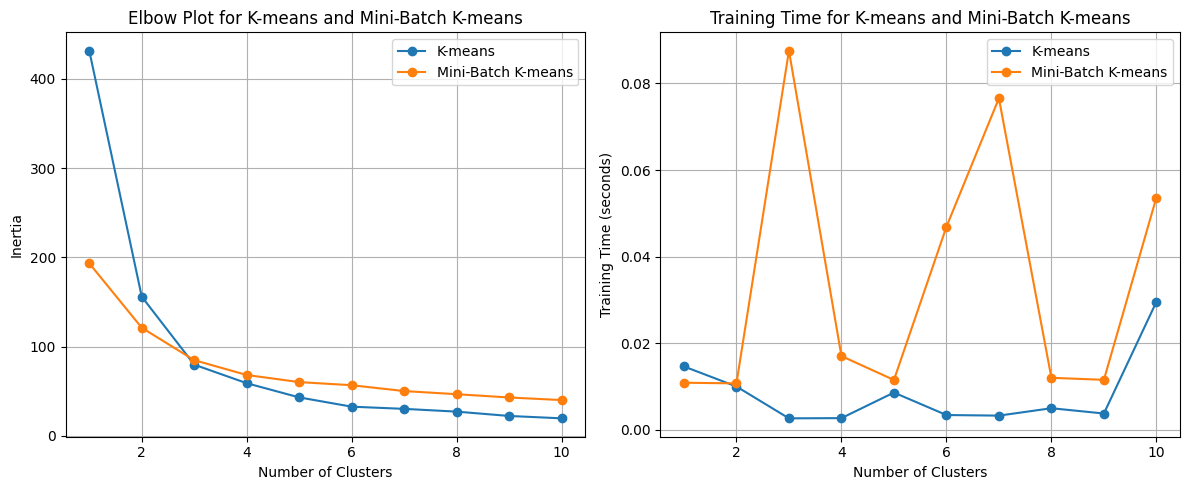

In [139]:
create_elbow_plot(X_h1_scaled, max_clusters=10, sample_fraction=0.1)

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.51 for 8 clusters
Best score for Davies Bouldin metric: 0.68 for 13 clusters
Best score for Calinski metric: 192.59 for 14 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



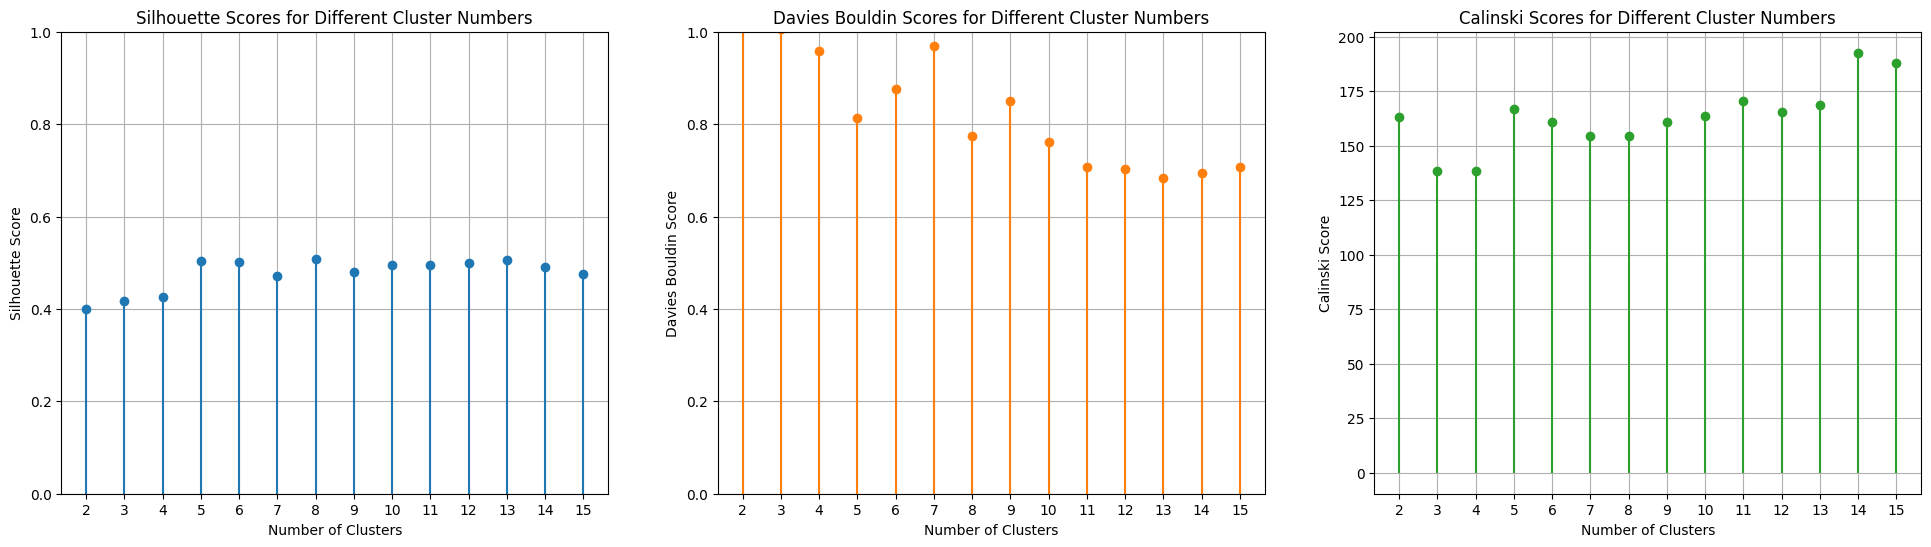

In [153]:
min_clusters = 2
max_clusters = 15

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2], calinski_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h1_train, X_h1_test, n_clusters)

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores)

### Hospital 2

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.64 for 3 clusters
Best score for Davies Bouldin metric: 0.59 for 3 clusters
Best score for Calinski metric: 296.11 for 3 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



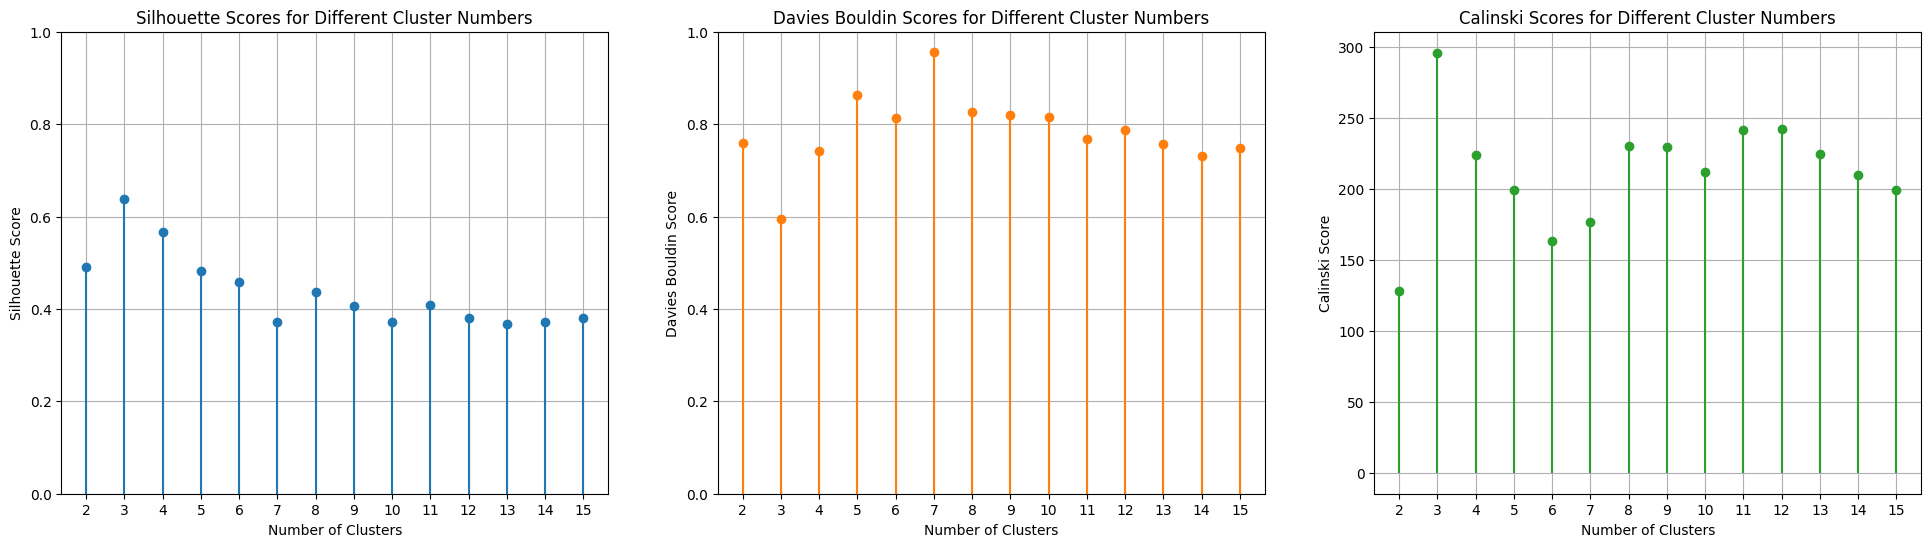

In [147]:
min_clusters = 2
max_clusters = 15

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2], calinski_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h2_train, X_h2_test, n_clusters)

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores)

### Hospital 3

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.54 for 2 clusters
Best score for Davies Bouldin metric: 0.75 for 2 clusters
Best score for Calinski metric: 453.94 for 2 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



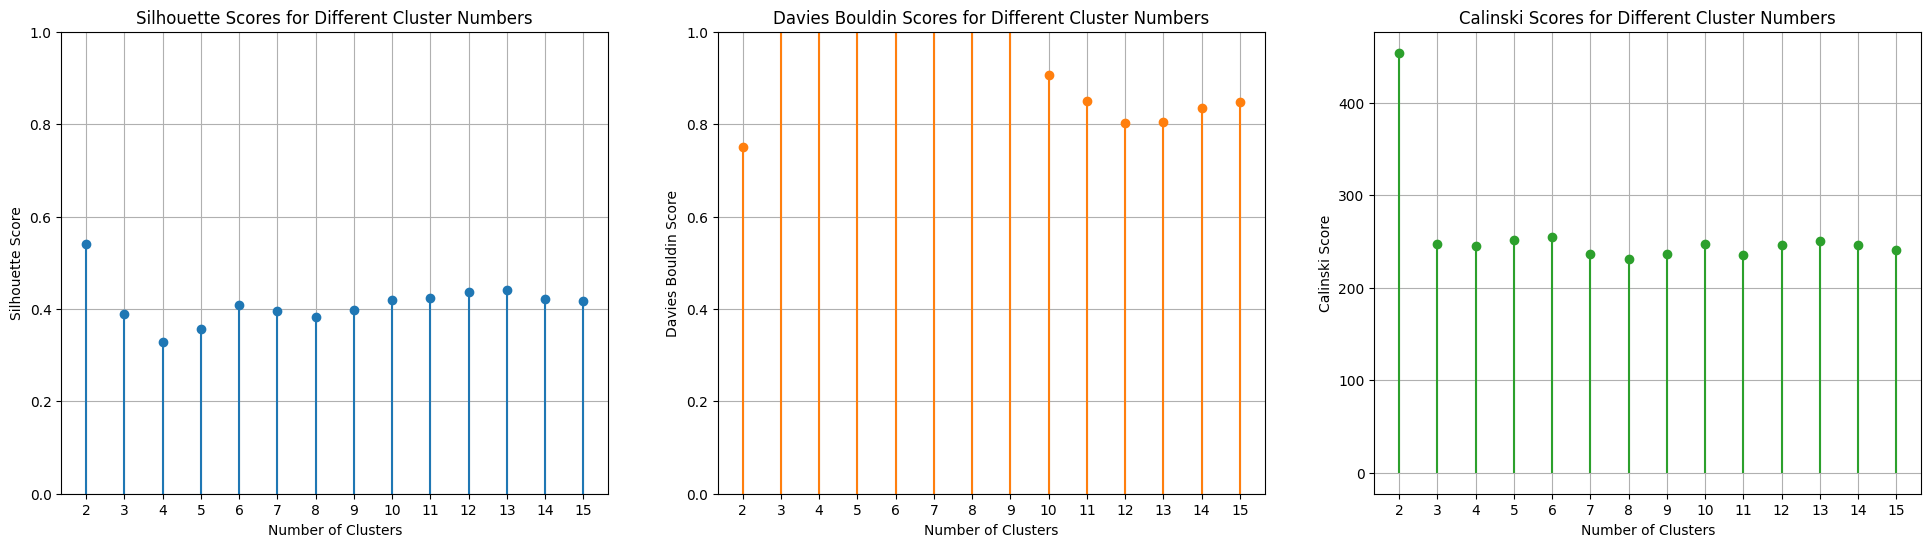

In [148]:
min_clusters = 2
max_clusters = 15

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2], calinski_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h3_train, X_h3_test, n_clusters)

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores)

### Hospital 4

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.59 for 5 clusters
Best score for Davies Bouldin metric: 0.60 for 10 clusters
Best score for Calinski metric: 277.52 for 13 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



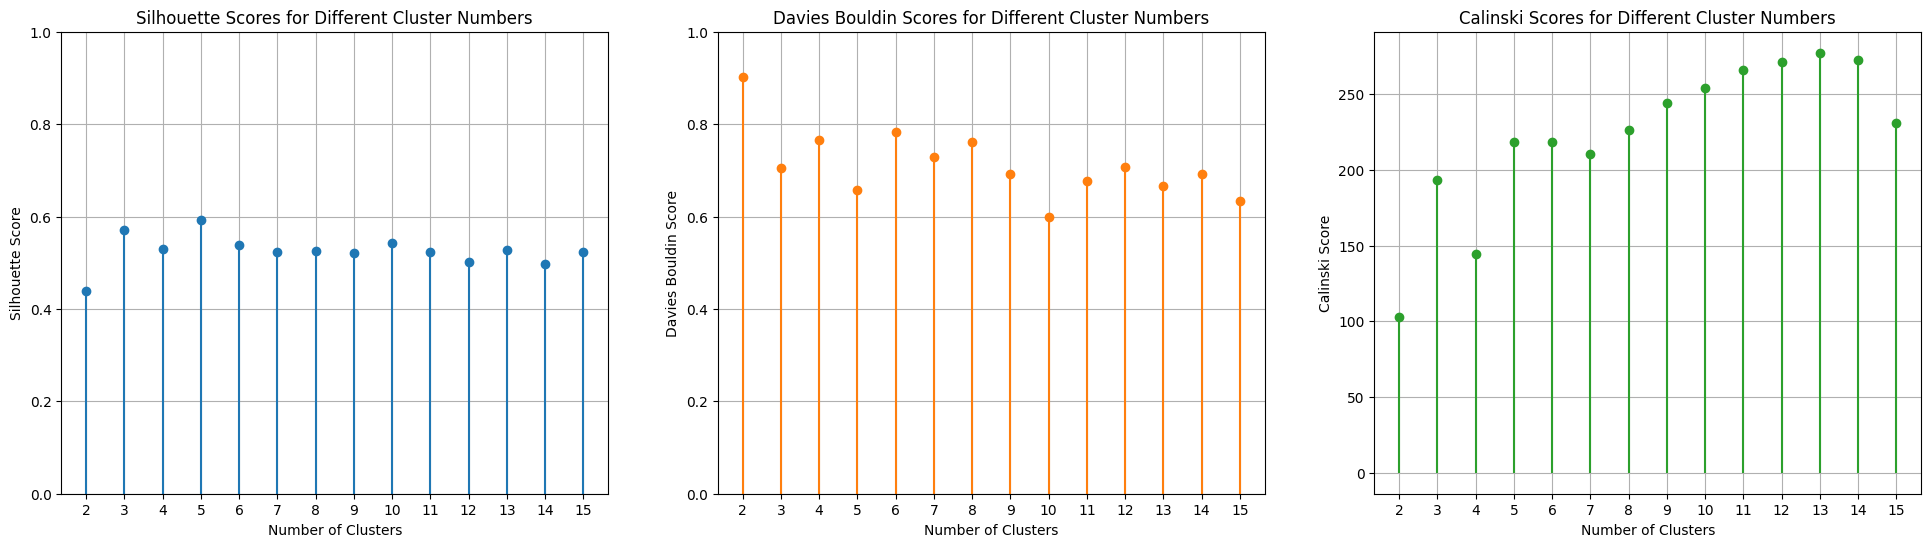

In [149]:
min_clusters = 2
max_clusters = 15

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2], calinski_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h4_train, X_h4_test, n_clusters)

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores)

## 4.4 - Fit test

In [150]:
from IPython.display import display

def model_validation(df, X, columns, n_clusters = 2):

  model = MiniBatchKMeans(n_clusters=n_clusters,
                          init='k-means++',
                          n_init=1,
                          batch_size=100,
                          max_iter=1000,
                          random_state=42)

  labels  = model.fit_predict(X)

  df['cluster'] = labels

  description = df.groupby("cluster")[columns]
  n_drugs = description.size()
  description = description.median()
  description['n_drugs'] = n_drugs
  display(description.head(n_clusters))
  return labels

In [49]:
def visu_clusters(df, x1, x2, labels):
  plt.figure(figsize=(12, 6))
  scatter = plt.scatter(df[x1].astype('string'), df[x2], c=labels, s=5, cmap='rainbow')
  plt.xlabel(x1)
  plt.ylabel(x2)
  plt.title(f'Scatter plot of {x1}' + f' over {x2}')
  plt.xticks(rotation=90)
  plt.grid()
  plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], title="Categories")
  plt.show()

In [50]:
from mpl_toolkits.mplot3d import Axes3D

def visu_clusters_3d(df1, df2, df3, df4, x1, x2, labels1, labels2, labels3, labels4):
    fig = plt.figure(figsize=(24, 18))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for Hospital 1
    ax.scatter(df1[x1].astype('string'), np.ones(len(df1)), df1[x2], c=labels1, s=5, cmap='rainbow')

    # Scatter plot for Hospital 2
    ax.scatter(df2[x1].astype('string'), 2 * np.ones(len(df2)), df2[x2], c=labels2, s=5, cmap='rainbow')

    # Scatter plot for Hospital 3
    ax.scatter(df3[x1].astype('string'), 3 * np.ones(len(df3)), df3[x2], c=labels3, s=5, cmap='rainbow')

    # Scatter plot for Hospital 4
    ax.scatter(df4[x1].astype('string'), 4 * np.ones(len(df4)), df4[x2], c=labels4, s=5, cmap='rainbow')

    # Set labels and title
    ax.set_xlabel(x1)
    ax.set_ylabel('Hospital')
    ax.set_zlabel(x2)
    ax.set_title('3D Scatter Plot')

    # Set y-ticks and labels for hospitals
    ax.set_yticks([1, 2, 3, 4])
    ax.set_yticklabels(['Hospital 1', 'Hospital 2', 'Hospital 3', 'Hospital 4'])

    # Increase space between ticks and axis label
    ax.tick_params(axis='x', rotation=90, pad=10)
    ax.tick_params(axis='y', pad=10)

    # Show the plot
    plt.show()


In [51]:
def visu_clusters_all(df1, df2, df3, df4, x1, x2, labels1, labels2, labels3, labels4):
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 18))

  # Hospital 1
  axs[0, 0].scatter(df1[x1].astype('string'), df1[x2], c=labels1, s=5, cmap='rainbow')
  axs[0, 0].set_xlabel(x1)
  axs[0, 0].set_ylabel(x2)
  axs[0, 0].set_title(f'Scatter plot of {x1} over {x2} - Hospital 1')
  axs[0, 0].grid(True)
  axs[0, 0].tick_params(axis='x', rotation=90, pad=10)  # Increase space between ticks and axis label

  # Hospital 2
  axs[0, 1].scatter(df2[x1].astype('string'), df2[x2], c=labels2, s=5, cmap='rainbow')
  axs[0, 1].set_xlabel(x1)
  axs[0, 1].set_ylabel(x2)
  axs[0, 1].set_title(f'Scatter plot of {x1} over {x2} - Hospital 2')
  axs[0, 1].grid(True)
  axs[0, 1].tick_params(axis='x', rotation=90, pad=10)  # Increase space between ticks and axis label

  # Hospital 3
  axs[1, 0].scatter(df3[x1].astype('string'), df3[x2], c=labels3, s=5, cmap='rainbow')
  axs[1, 0].set_xlabel(x1)
  axs[1, 0].set_ylabel(x2)
  axs[1, 0].set_title(f'Scatter plot of {x1} over {x2} - Hospital 3')
  axs[1, 0].grid(True)
  axs[1, 0].tick_params(axis='x', rotation=90, pad=10)  # Increase space between ticks and axis label

  # Hospital 4
  axs[1, 1].scatter(df4[x1].astype('string'), df4[x2], c=labels4, s=5, cmap='rainbow')
  axs[1, 1].set_xlabel(x1)
  axs[1, 1].set_ylabel(x2)
  axs[1, 1].set_title(f'Scatter plot of {x1} over {x2} - Hospital 4')
  axs[1, 1].grid(True)
  axs[1, 1].tick_params(axis='x', rotation=90, pad=10)  # Increase space between ticks and axis label

  plt.subplots_adjust(hspace=0.4)  # Increase space between subplots
  plt.show()

### Hospital 1

QUANTITY  POPULATION  P_MEDICAL  PN_MEDICAL  N_UFS  LIT_HC  SEJ_SLD  \
cluster                                                                        
0          2524.5    571879.0      684.0      5295.0    3.5  1411.0     57.0   
1           960.0    569894.0      843.0      5438.0    2.0  1353.0     92.0   
2          3124.5    570662.0      805.0      5362.0    5.0  1364.0     93.0   
3          2800.0    572443.0      806.0      5303.0    5.0  1360.0    122.0   
4          2670.0    572744.0      683.0      5273.0    4.0  1388.0     51.0   
5          1680.0    571632.0      684.0      5321.0    3.0  1418.0     79.0   
6          1085.0    571675.0      683.0      5270.0    2.0  1471.0    109.0   

         QUANTITY_MA  n_drugs  
cluster                        
0           0.135120      228  
1           0.102044      131  
2           0.161276      252  
3           0.139973      149  
4           0.149479      127  
5           0.090747      219  
6           0.035454      102

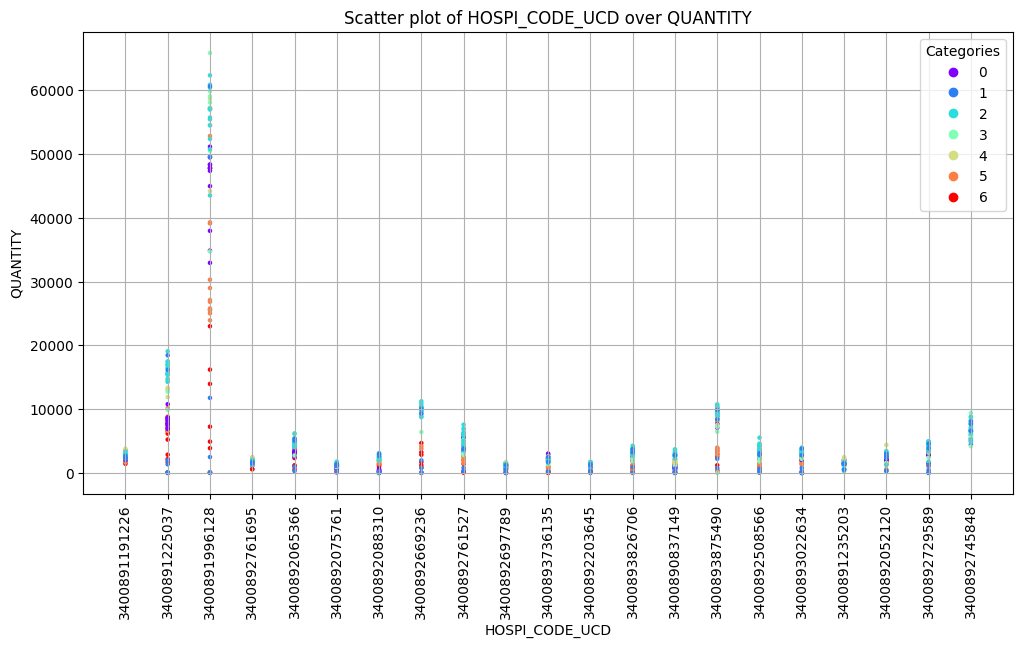

In [151]:
labels_h1 = model_validation(df_h1.copy(),
                             df_h1[['N_UFS', 'SEJ_SSR', 'P_MEDICAL', 'PN_MEDICAL', 'POPULATION']].values,
                              ["QUANTITY", "POPULATION", "P_MEDICAL", "PN_MEDICAL", "N_UFS", "LIT_HC", "SEJ_SLD", "QUANTITY_MA"],
                             n_clusters = 7)
print()
visu_clusters(df_h1.copy(), 'HOSPI_CODE_UCD', 'QUANTITY', labels_h1)

### Hospital 2

QUANTITY  POPULATION  P_MEDICAL  PN_MEDICAL  N_UFS  LIT_HC  \
cluster                                                               
0          3719.0    539067.0      714.0      5001.0    6.0  1157.0   
1          3299.0    542302.0      706.0      5013.0    6.0  1141.0   
2          3900.0    541454.0      703.0      5007.0    7.0  1159.0   

         QUANTITY_MA  n_drugs  
cluster                        
0           0.166032      196  
1           0.168914      251  
2           0.181096      250

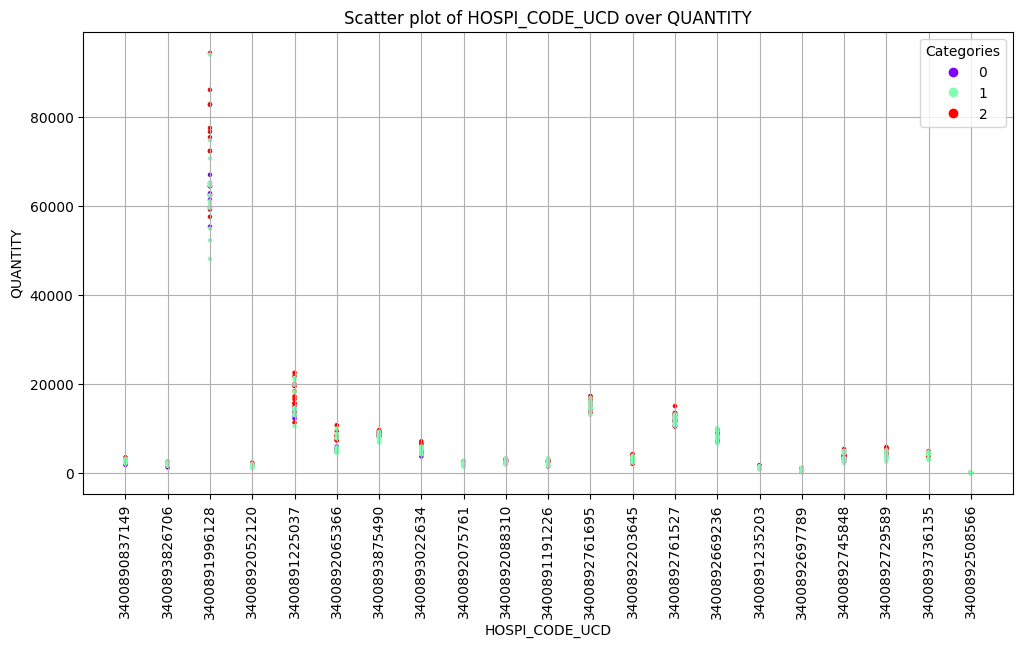

In [ ]:
labels_h2 = model_validation(df_h2.copy(), X_h2, ["QUANTITY", "POPULATION", "P_MEDICAL", "PN_MEDICAL", "N_UFS", "LIT_HC", "QUANTITY_MA"], n_clusters = 3)
print()
visu_clusters(df_h2.copy(), 'HOSPI_CODE_UCD', 'QUANTITY', labels_h2)

### Hospital 3

QUANTITY  POPULATION  P_MEDICAL  PN_MEDICAL  N_UFS  LIT_HC  \
cluster                                                               
0         30980.0   1159220.0     1322.0      7439.0   21.5  2008.0   
1          5262.0   1120190.0     1239.0      7161.0    8.0  2053.0   
2          5105.0   1144892.0     1316.0      7356.0    7.0  2027.0   
3          5850.0   1171739.0     1318.0      7578.0    8.0  2011.0   
4          5370.0   1132481.0     1290.0      7336.0    8.0  2030.0   
5          5155.0   1107398.0     1158.0      7129.0    7.0  2063.0   
6          4950.0   1159220.0     1322.0      7439.0    6.5  2008.0   
7         29022.5   1144892.0     1316.0      7356.0   21.0  2027.0   

         QUANTITY_MA  n_drugs  
cluster                        
0           0.122499       27  
1           0.119567      243  
2           0.125786      216  
3           0.121307      235  
4           0.123588      252  
5           0.119141      163  
6           0.122095      225  
7           0.124852       36

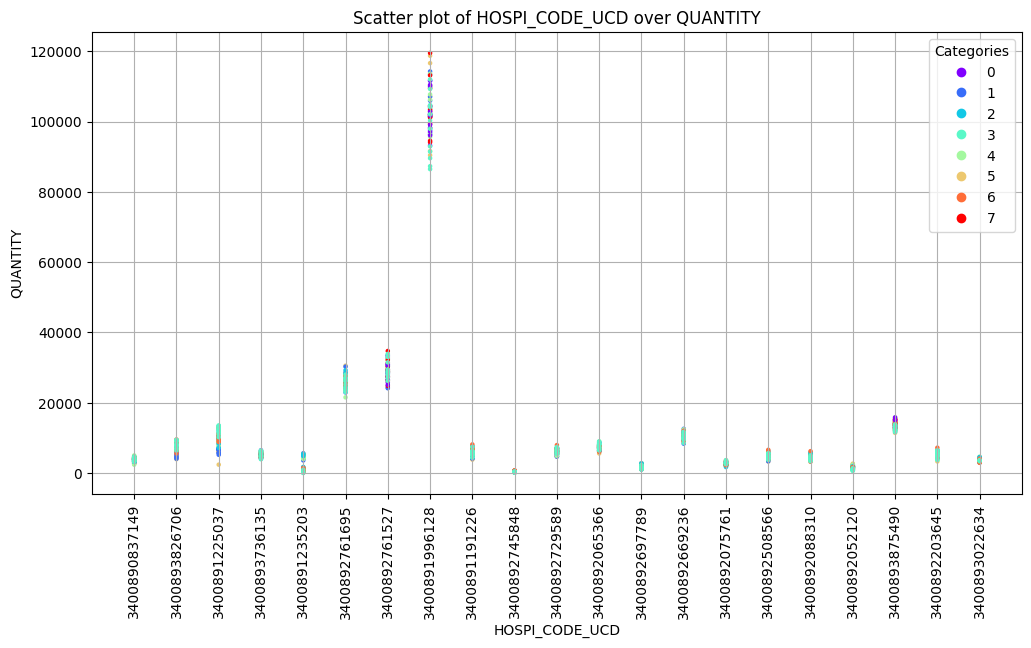

In [ ]:
labels_h3 = model_validation(df_h3.copy(), X_h3, ["QUANTITY", "POPULATION", "P_MEDICAL", "PN_MEDICAL", "N_UFS", "LIT_HC", "QUANTITY_MA"], n_clusters = 8)
print()
visu_clusters(df_h3.copy(), 'HOSPI_CODE_UCD', 'QUANTITY', labels_h3)

### Hospital 4

QUANTITY  POPULATION  P_MEDICAL  PN_MEDICAL  N_UFS  LIT_HC  \
cluster                                                               
0         19760.0   1835903.0     2526.0     15604.0    2.0  4536.0   
1          8600.0   1859524.0     2627.0     15723.0    1.0  4477.0   
2          9265.0   1843319.0     2556.0     15650.0    1.0  4500.0   
3          8490.0   1871364.0     2639.0     15774.0    1.0  4530.0   
4          8820.0   1835903.0     2526.0     15604.0    1.0  4536.0   
5         21300.0   1859524.0     2627.0     15723.0    2.0  4477.0   
6         19600.0   1843319.0     2556.0     15650.0    2.0  4500.0   
7         21010.0   1871364.0     2639.0     15774.0    2.0  4530.0   
8         12300.0   1859524.0     2627.0     15723.0    1.5  4477.0   
9         13440.0   1835903.0     2526.0     15604.0    1.5  4536.0   
10        12780.0   1843319.0     2556.0     15650.0    1.5  4500.0   
11         1600.0   1871364.0     2639.0     15774.0    3.0  4530.0   
12        14688.0   1871364.0     2639.0     15774.0    1.5  4530.0   

         QUANTITY_MA  n_drugs  
cluster                        
0           0.148188       45  
1           0.159997      181  
2           0.164421      174  
3           0.157073       48  
4           0.151135      168  
5           0.173325       41  
6           0.169871       50  
7           0.163106        5  
8           0.163532       23  
9           0.158208       15  
10          0.160123       11  
11          0.248858        2  
12          0.163589        7

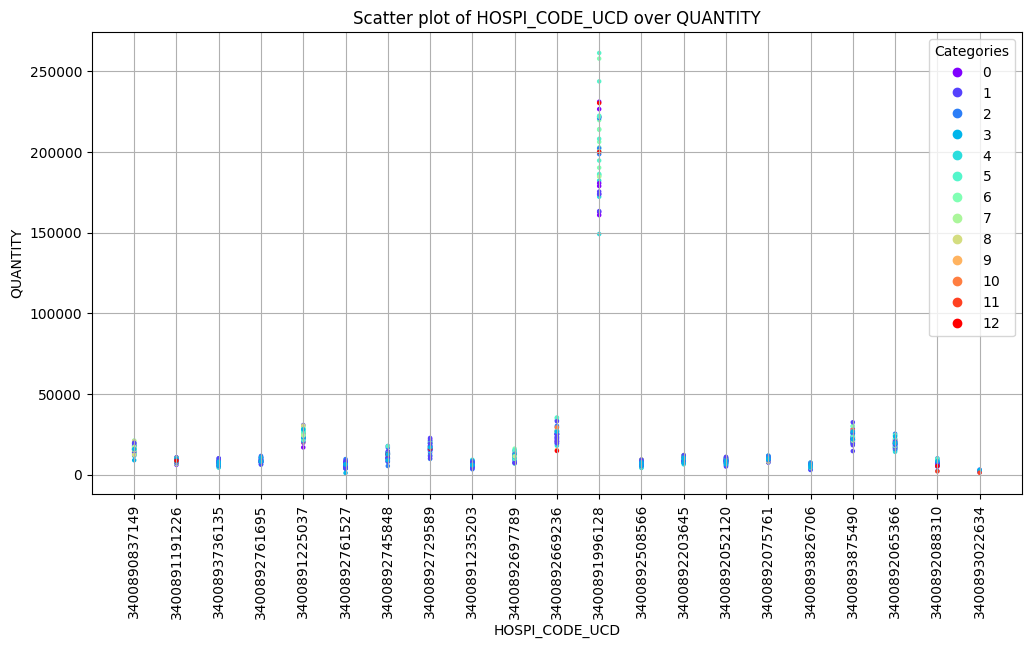

In [ ]:
labels_h4 = model_validation(df_h4.copy(), X_h4, ["QUANTITY", "POPULATION", "P_MEDICAL", "PN_MEDICAL", "N_UFS", "LIT_HC", "QUANTITY_MA"], n_clusters = 13)
print()
visu_clusters(df_h4.copy(), 'HOSPI_CODE_UCD', 'QUANTITY', labels_h4)

### Visualizing the 4 hospitals

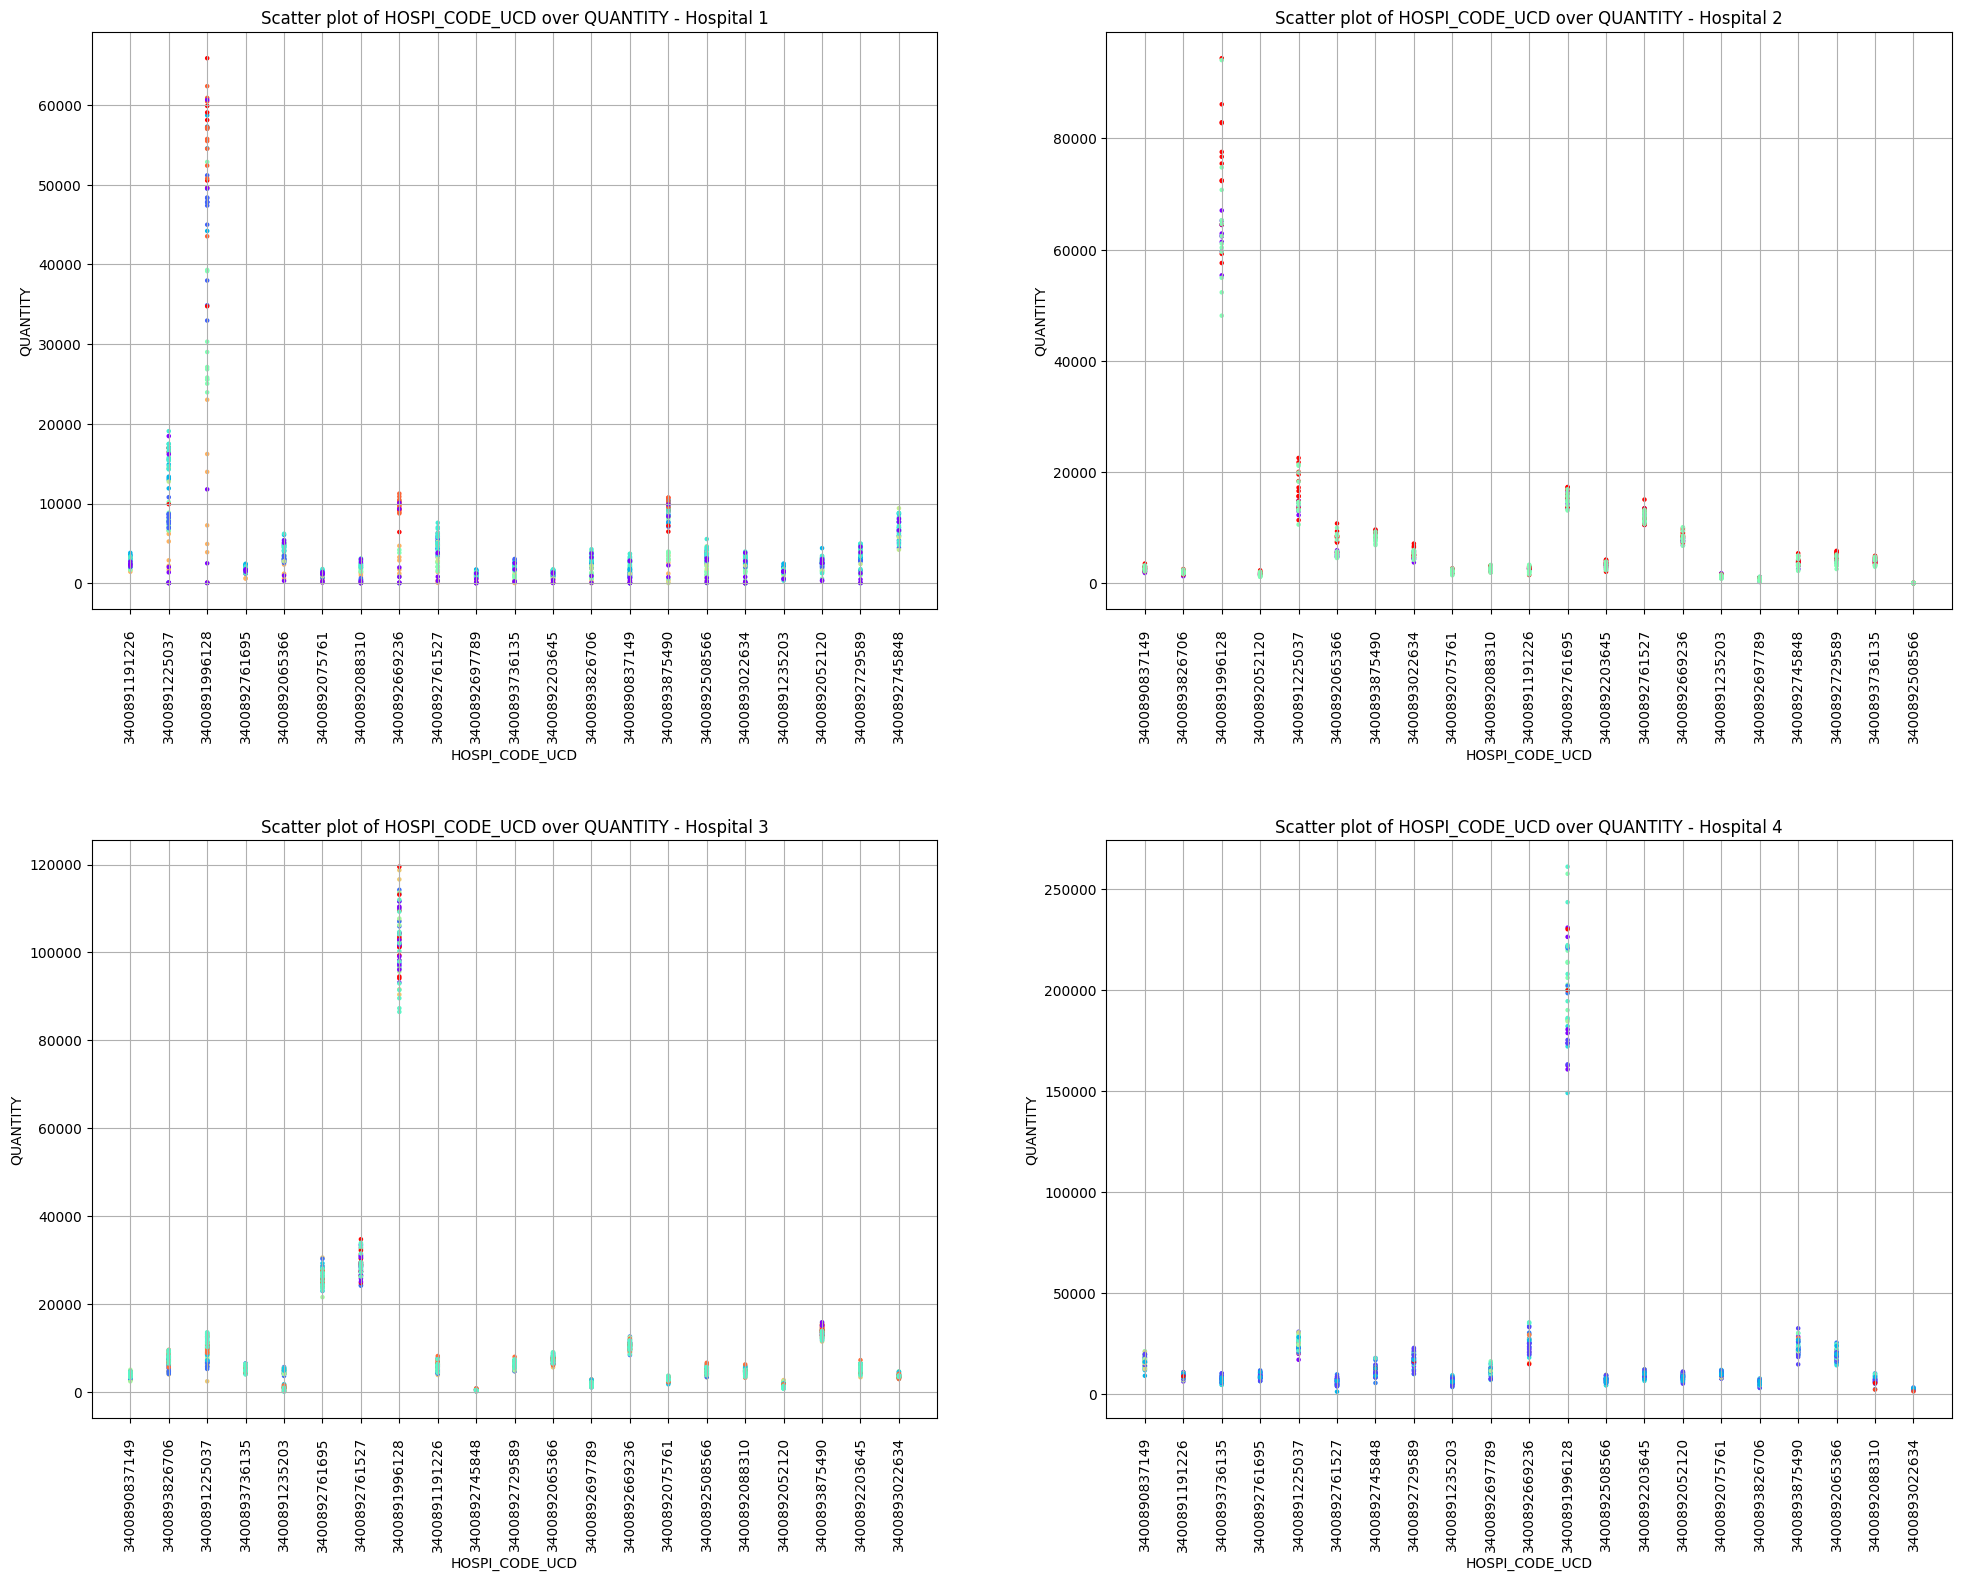

In [ ]:
visu_clusters_all(df_h1.copy(), df_h2.copy(), df_h3.copy(), df_h4.copy(), 'HOSPI_CODE_UCD', 'QUANTITY', labels_h1, labels_h2, labels_h3, labels_h4)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams
rcParams['axes.labelpad'] = 40

def plot_dataframes_3d_static(df_h1, df_h2, df_h3, df_h4, labels_h1, labels_h2, labels_h3, labels_h4, x = 'HOSPI_CODE_UCD', y = 'HOSPITAL', z = 'QUANTITY'):
    fig = plt.figure(figsize=(25, 12))
    ax = fig.add_subplot(projection='3d')

    X1uniques, x1s = np.unique(df_h1[x].copy().astype('string').values, return_inverse=True)
    X2uniques, x2s = np.unique(df_h2[x].copy().astype('string').values, return_inverse=True)
    X3uniques, x3s = np.unique(df_h3[x].copy().astype('string').values, return_inverse=True)
    X4uniques, x4s = np.unique(df_h4[x].copy().astype('string').values, return_inverse=True)

    y1s = np.linspace(1, 1, len(x1s))
    y2s = np.linspace(2, 2, len(x2s))
    y3s = np.linspace(3, 3, len(x3s))
    y4s = np.linspace(4, 4, len(x4s))

    z1s = df_h1[z].copy().values
    z2s = df_h2[z].copy().values
    z3s = df_h3[z].copy().values
    z4s = df_h4[z].copy().values

    ax.scatter(x1s, y1s, z1s, c=labels_h1, cmap='rainbow', marker='o', s=20)
    ax.scatter(x2s, y2s, z2s, c=labels_h2, cmap='rainbow', marker='o', s=20)
    ax.scatter(x3s, y3s, z3s, c=labels_h3, cmap='rainbow', marker='o', s=20)
    ax.scatter(x4s, y4s, z4s, c=labels_h4, cmap='rainbow', marker='o', s=20)


    ax.set_ylabel(y)

    ax.set(xticks=range(len(X1uniques)), xticklabels=X1uniques)
    ax.set_xlim(-1, len(X1uniques) + 1)
    ax.set_xticklabels(X1uniques, rotation=45, ha='center')
    ax.tick_params(axis='x', pad=10, labelleft=True)

    ax.set_yticks([1, 2, 3, 4])
    ax.tick_params(axis='y', pad=3)
    ax.tick_params(axis="z", pad=15)
    ax.set_zlabel(z, labelpad=20)
    ax.set_xlabel(x, labelpad=45)

    plt.subplots_adjust(left=1, bottom=1, right=3, top=3, wspace=1, hspace=1)

    plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

def plot_dataframes_3d_dynamic(df_h1, df_h2, df_h3, df_h4, labels_h1, labels_h2, labels_h3, labels_h4, x='HOSPI_CODE_UCD', y='HOSPITAL', z='QUANTITY'):
    fig = make_subplots(specs=[[{'type': 'scatter3d'}]])

    x1s = df_h1[x].astype(str).values
    x2s = df_h2[x].astype(str).values
    x3s = df_h3[x].astype(str).values
    x4s = df_h4[x].astype(str).values

    y1s = np.linspace(1, 1, len(x1s))
    y2s = np.linspace(2, 2, len(x2s))
    y3s = np.linspace(3, 3, len(x3s))
    y4s = np.linspace(4, 4, len(x4s))

    z1s = df_h1[z].values
    z2s = df_h2[z].values
    z3s = df_h3[z].values
    z4s = df_h4[z].values

    fig.add_trace(
        go.Scatter3d(x=x1s, y=y1s, z=z1s, mode='markers', marker=dict(color=labels_h1, size=5, colorscale='Rainbow')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=x2s, y=y2s, z=z2s, mode='markers', marker=dict(color=labels_h2, size=5, colorscale='Rainbow')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=x3s, y=y3s, z=z3s, mode='markers', marker=dict(color=labels_h3, size=5, colorscale='Rainbow')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=x4s, y=y4s, z=z4s, mode='markers', marker=dict(color=labels_h4, size=5, colorscale='Rainbow')),
        row=1, col=1
    )

    fig.update_layout(scene=dict(xaxis_title=x, yaxis_title=y, zaxis_title=z))
    fig.update_layout(scene=dict(xaxis=dict(ticktext=x1s, tickvals=np.arange(len(x1s)), tickangle=0, tickfont=dict(size=10)),
                                 yaxis=dict(ticktext=['1', '2', '3', '4'], tickvals=[1, 2, 3, 4])),
                      margin=dict(r=200), height=800, width=1200)
    fig.show()


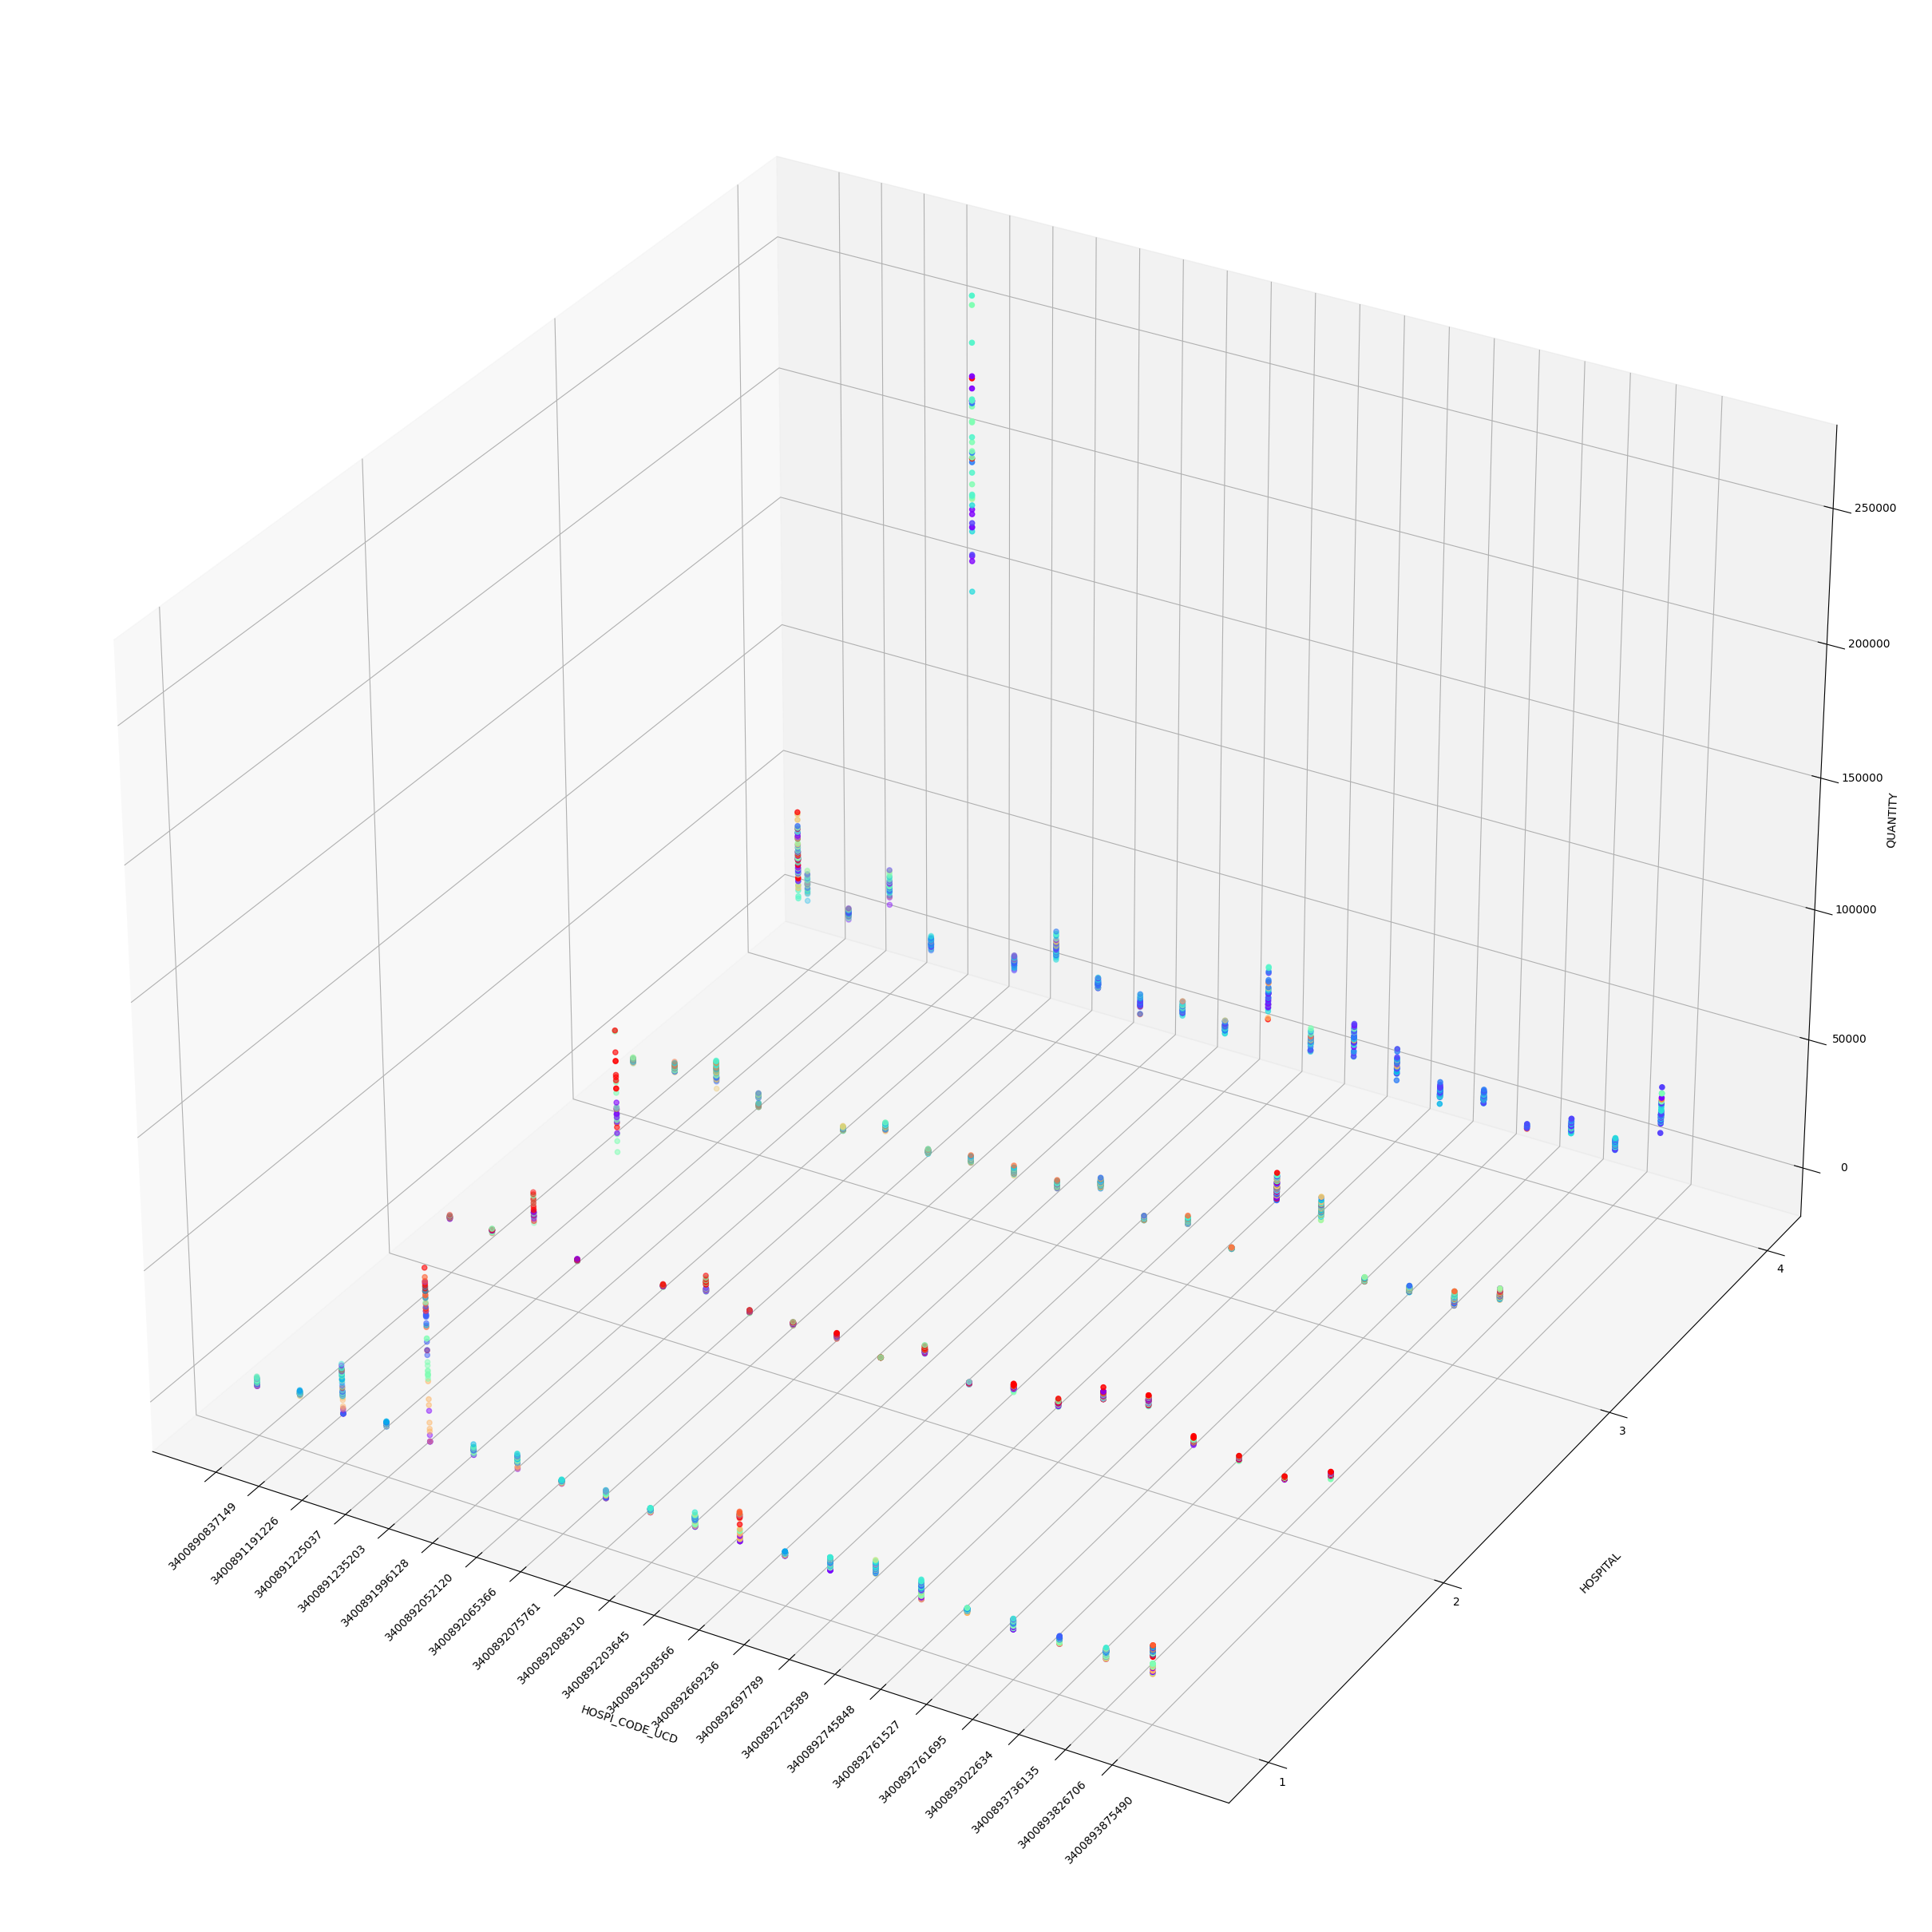

In [ ]:
plot_dataframes_3d_static(df_h1.copy(), df_h2.copy(), df_h3.copy(), df_h4.copy(), labels_h1, labels_h2, labels_h3, labels_h4)

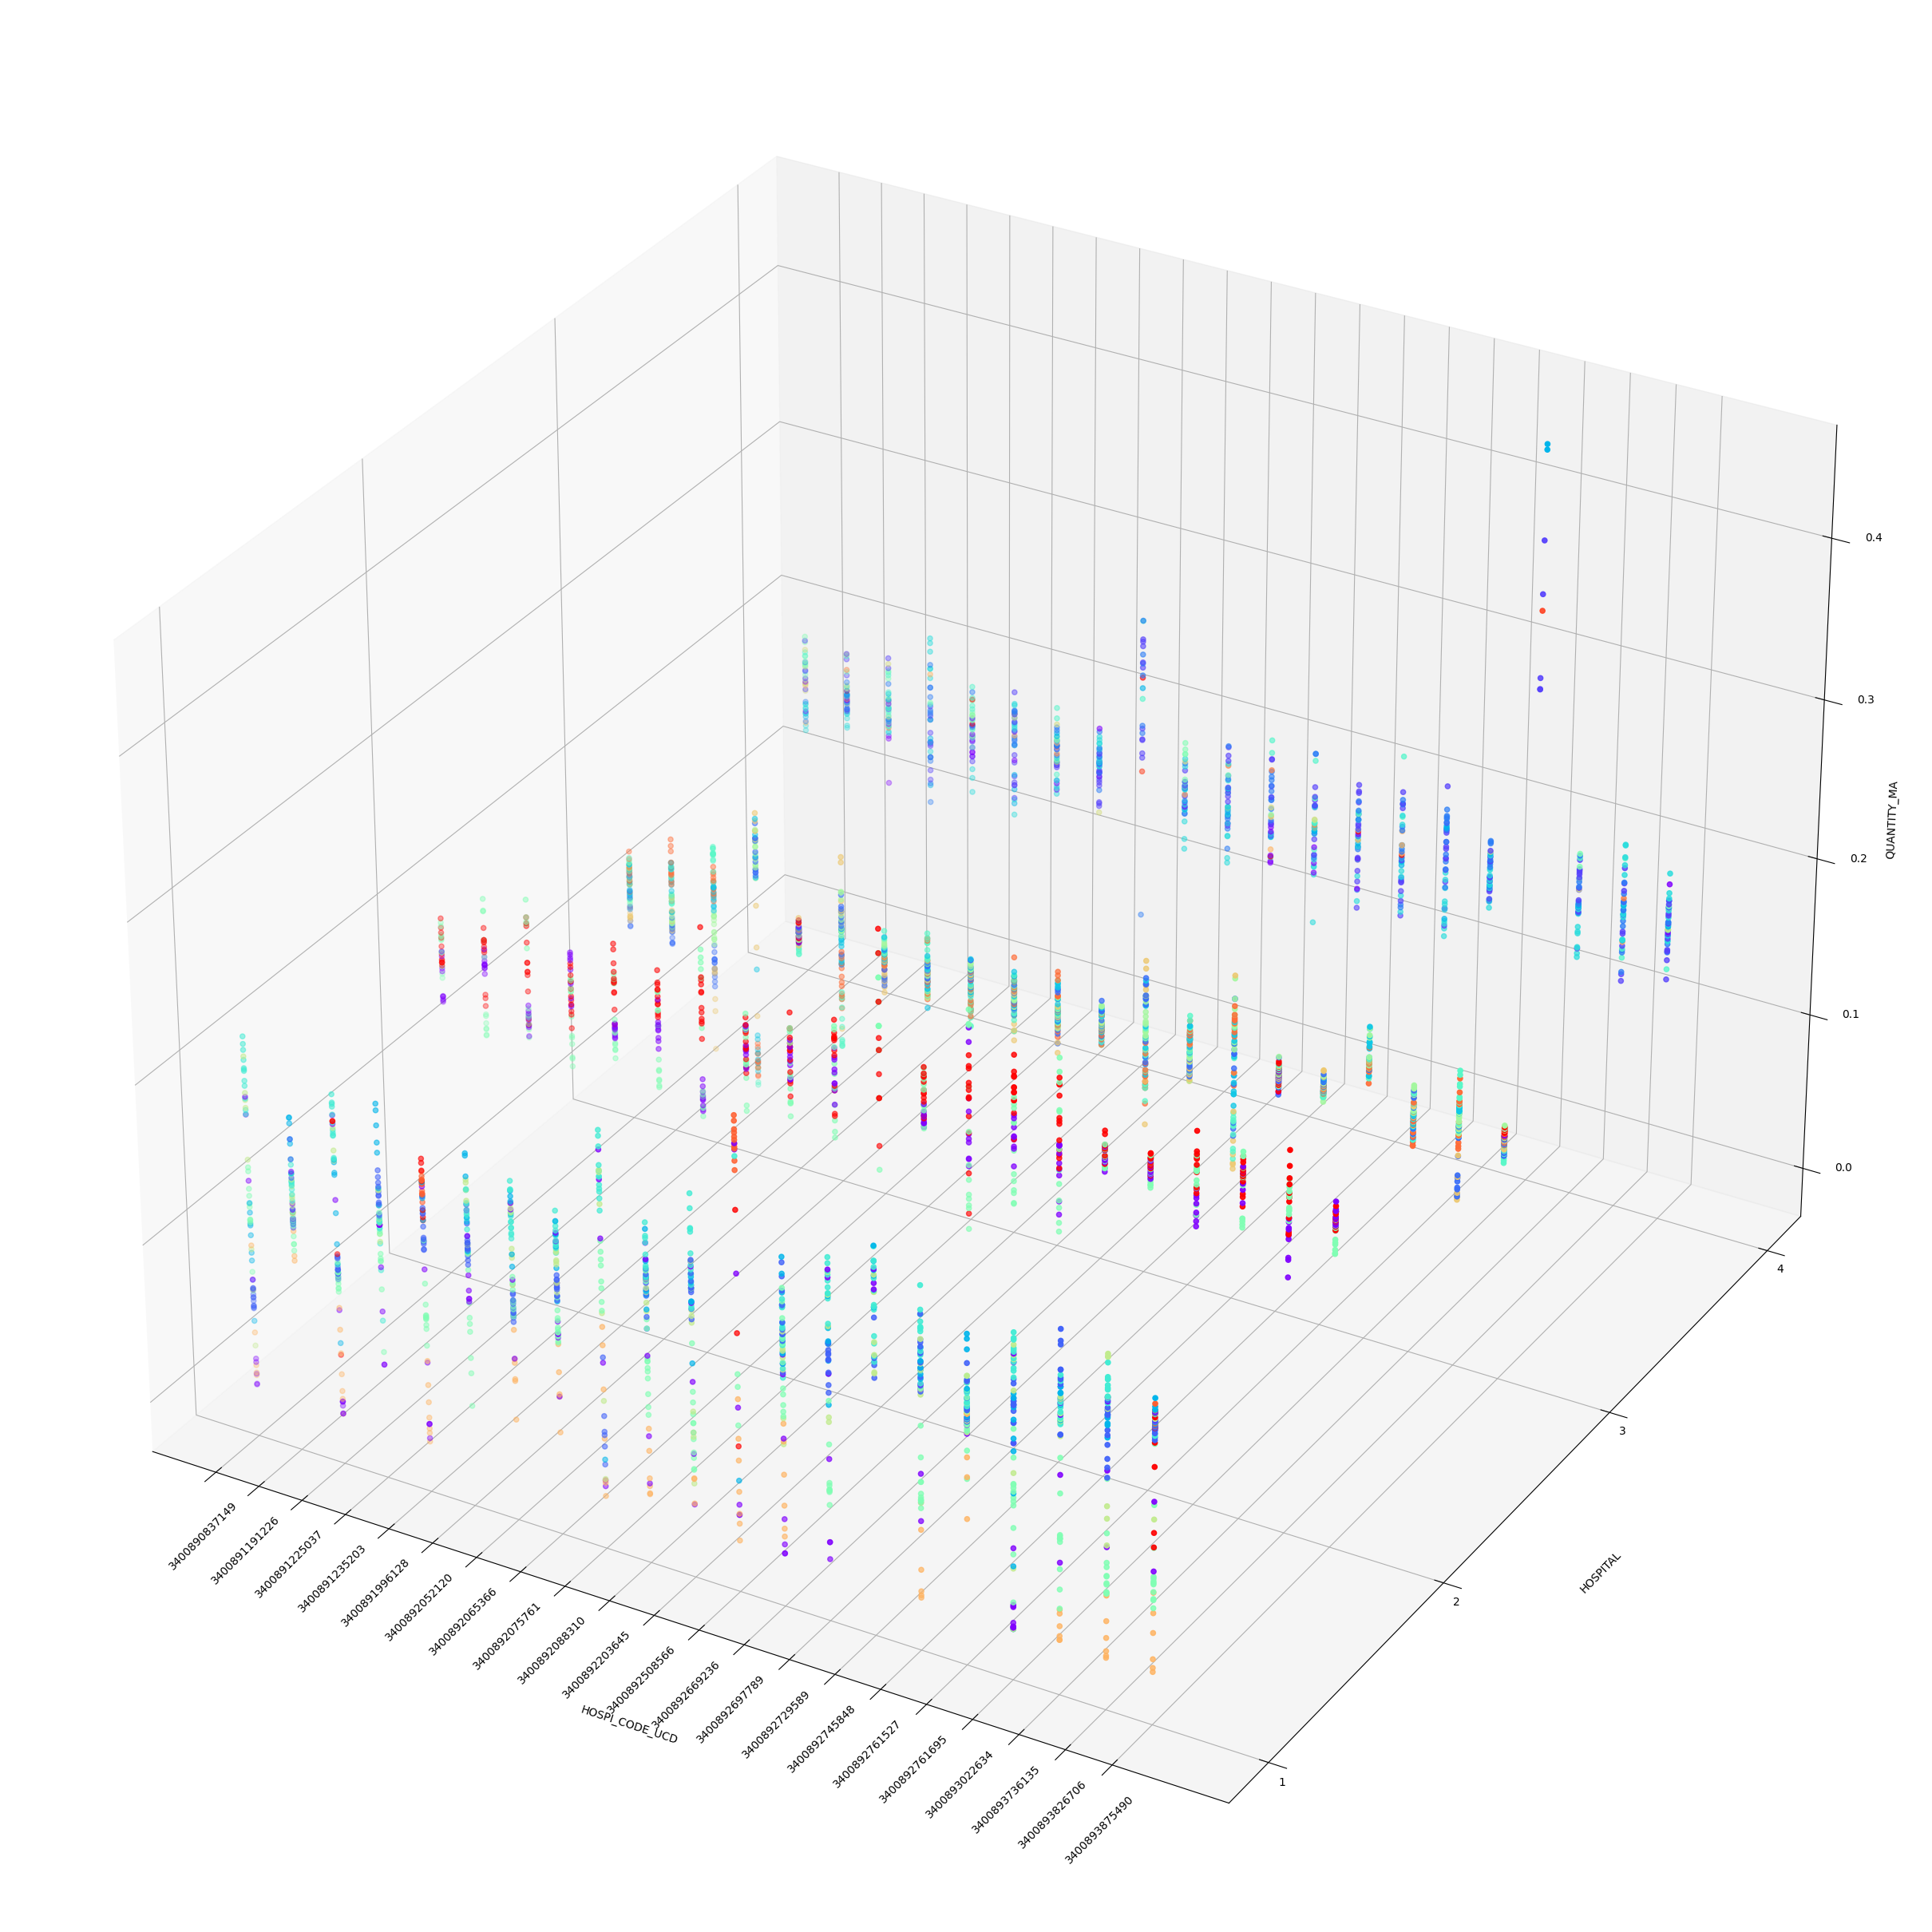

In [ ]:
plot_dataframes_3d_static(df_h1.copy(), df_h2.copy(), df_h3.copy(), df_h4.copy(), labels_h1, labels_h2, labels_h3, labels_h4, z = 'QUANTITY_MA')

In [ ]:
plot_dataframes_3d_dynamic(df_h1.copy(), df_h2.copy(), df_h3.copy(), df_h4.copy(), labels_h1, labels_h2, labels_h3, labels_h4, z = 'QUANTITY')

In [ ]:
plot_dataframes_3d_dynamic(df_h1.copy(), df_h2.copy(), df_h3.copy(), df_h4.copy(), labels_h1, labels_h2, labels_h3, labels_h4, z = 'QUANTITY_MA')

### Saving the datasets with clusters

In [ ]:
df_h1['CLUSTER'] = labels_h1
df_h2['CLUSTER'] = labels_h2
df_h3['CLUSTER'] = labels_h3
df_h4['CLUSTER'] = labels_h4


df_h1.to_csv('df_h1_clustered_9.csv', index=False)
df_h2.to_csv('df_h2_clustered_3.csv', index=False)
df_h3.to_csv('df_h3_clustered_8.csv', index=False)
df_h4.to_csv('df_h4_clustered_13.csv', index=False)